## 산탄데르 은행의 고객만족도 예측
2021.01.17

dataset 출처 : https://www.kaggle.com/c/santander-customer-satisfaction/data



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

#산탄데르 고객만족도를 데이터로 불러온다

cust_df = pd.read_csv("./train_santander.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


# 데이터 전처리

DataFrame.info()를 실행하면 일반적으로 컬럼과 그에관한 정보가 나오지만 
실습에 사용되는 데이터의 경우 column 수가 371개로 너무 많아 간략한 정보만 제공됨

In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


# var3: nationality of the customer로 추정

NULL값은 없으나 var3의 경우 min값이 -999999로 나오는것을 보아 NULL값임을 짐작할 수있다. <var3 피처값의 분포>

In [4]:
cust_df['var3'].value_counts()[:20]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
 6            82
 0            75
 10           72
 11           66
 5            63
 14           61
 15           34
 18           10
 16            9
 17            7
Name: var3, dtype: int64

* var3값의 분포를 보면 -999999가 극단적인 값임을 알 수 있고 outlier일 가능성이 크다. 
이는 평균을 왜곡하고 다른 값들에 영향을 줄 수 있기 때문에 피처값을 최빈값 2로 대체한다.


In [5]:
cust_df['var3'].replace(-999999,2 ,inplace=True)

* ID피처는 불필요한 값이므로 drop

In [9]:
cust_df.drop('ID',axis=1, inplace = True)

* 불만족 건수는 1, 만족 건수는 0으로 집계

In [6]:
print(cust_df['TARGET'].value_counts())

0    73012
1     3008
Name: TARGET, dtype: int64


In [7]:
unsatisfied_count = cust_df[cust_df['TARGET']==1]['TARGET'].count()
satisfied_count = cust_df[cust_df['TARGET']==0]['TARGET'].count()

print("불만족 고객의 수: ", unsatisfied_count)
print("만족 고객의 수: ",satisfied_count)
print("불만족 고객의 비율은 {0:.2f}".format(unsatisfied_count/cust_df['TARGET'].count()))

불만족 고객의 수:  3008
만족 고객의 수:  73012
불만족 고객의 비율은 0.04


* feature와 lable(TARGET) 분리

In [13]:
# -1은 뒤에서 첫번째행, 즉 target값 의미
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))
print('레이블 데이터 shape:{0}'.format(y_labels.shape))

피처 데이터 shape:(76020, 369)
레이블 데이터 shape:(76020,)


# train, test dataset 분리

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,test_size=0.2,random_state = 1, stratify=y_labels)

* 비대칭한 dataset이므로 균일하게 분리

In [18]:
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960438
1    0.039562
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.960405
1    0.039595
Name: TARGET, dtype: float64


# XGBClassifier 로 학습


In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

#classifier객체 생성
xgb_c = XGBClassifier(n_estimators = 500, random_state=0)

* 과적합 방지를 위해 조기중단 150으로 설정,
검증 metric으로 auc 사용

In [28]:
#xgb_c 학습 수행, 검증평가는 auc
#eval_set 에 별도의 검증데이터셋을 넣어야하지만 데이터가 충분히 많지 않아서 test dataset으로 검증도 수행합니다
xgb_c.fit(X_train, y_train, early_stopping_rounds=150,eval_metric="auc", 
          eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-auc:0.82427	validation_1-auc:0.81147
[1]	validation_0-auc:0.83779	validation_1-auc:0.82350
[2]	validation_0-auc:0.84222	validation_1-auc:0.82524
[3]	validation_0-auc:0.84569	validation_1-auc:0.82663
[4]	validation_0-auc:0.84854	validation_1-auc:0.82716
[5]	validation_0-auc:0.85301	validation_1-auc:0.82907
[6]	validation_0-auc:0.85705	validation_1-auc:0.83094
[7]	validation_0-auc:0.86125	validation_1-auc:0.83335
[8]	validation_0-auc:0.86509	validation_1-auc:0.83257
[9]	validation_0-auc:0.86743	validation_1-auc:0.83268
[10]	validation_0-auc:0.87049	validation_1-auc:0.83256
[11]	validation_0-auc:0.87308	validation_1-auc:0.83285
[12]	validation_0-auc:0.87549	validation_1-auc:0.83263
[13]	validation_0-auc:0.87810	validation_1-auc:0.83268
[14]	validation_0-auc:0.88041	validation_1-auc:0.83276
[15]	validation_0-auc:0.88186	validation_1-auc:0.83339
[16]	validation_0-auc:0.88396	validation_1-auc:0.83296
[17]	validation_0-auc:0.88600	validation_1-auc:0.83418
[18]	validation_0-au

[149]	validation_0-auc:0.94775	validation_1-auc:0.81069
[150]	validation_0-auc:0.94787	validation_1-auc:0.81062
[151]	validation_0-auc:0.94795	validation_1-auc:0.81030
[152]	validation_0-auc:0.94810	validation_1-auc:0.80983
[153]	validation_0-auc:0.94813	validation_1-auc:0.80980
[154]	validation_0-auc:0.94830	validation_1-auc:0.80946
[155]	validation_0-auc:0.94834	validation_1-auc:0.80929
[156]	validation_0-auc:0.94835	validation_1-auc:0.80941
[157]	validation_0-auc:0.94849	validation_1-auc:0.80901
[158]	validation_0-auc:0.94904	validation_1-auc:0.80877
[159]	validation_0-auc:0.94939	validation_1-auc:0.80870
[160]	validation_0-auc:0.94954	validation_1-auc:0.80898
[161]	validation_0-auc:0.95039	validation_1-auc:0.80859
[162]	validation_0-auc:0.95069	validation_1-auc:0.80822
[163]	validation_0-auc:0.95088	validation_1-auc:0.80827
[164]	validation_0-auc:0.95122	validation_1-auc:0.80825
[165]	validation_0-auc:0.95167	validation_1-auc:0.80817
[166]	validation_0-auc:0.95173	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
xgb_roc_score= roc_auc_score(y_test, xgb_c.predict_proba(X_test)[:,1], 
                             average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.8352


# GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

xgb_c = XGBClassifier(n_estimators = 100, random_state=0)
params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75, 1] }

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. 
gridcv = GridSearchCV(xgb_c, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])



C:\Users\genni\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80306	validation_1-auc:0.79108
[1]	validation_0-auc:0.82146	validation_1-auc:0.81044
[2]	validation_0-auc:0.83299	validation_1-auc:0.81885
[3]	validation_0-auc:0.83445	validation_1-auc:0.81680
[4]	validation_0-auc:0.83787	validation_1-auc:0.82601
[5]	validation_0-auc:0.84138	validation_1-auc:0.82574
[6]	validation_0-auc:0.84097	validation_1-auc:0.82179
[7]	validation_0-auc:0.84786	validation_1-auc:0.82803
[8]	validation_0-auc:0.85010	validation_1-auc:0.83083
[9]	validation_0-auc:0.85002	validation_1-auc:0.82685
[10]	validation_0-auc:0.85014	validation_1-auc:0.82246
[11]	validation_0-auc:0.85022	validation_1-auc:0.81975
[12]	validation_0-auc:0.85558	validation_1-auc:0.82767
[13]	validation_0-auc:0.85988	validation_1-auc:0.83204
[14]	validation_0-auc:0.86218	validation_1-auc:0.83471
[15]	validation_0-auc:0.86381	validation_1-auc:0.83376
[16]	validation_0-auc:0.86528	validation_1-auc:0.83462
[17]	validation_0-auc:0.86682	validation_1-auc:0.83499
[18]	validation_0-au

[48]	validation_0-auc:0.88897	validation_1-auc:0.83049
[49]	validation_0-auc:0.88906	validation_1-auc:0.83039
[50]	validation_0-auc:0.88944	validation_1-auc:0.83011
[51]	validation_0-auc:0.88974	validation_1-auc:0.82973
[52]	validation_0-auc:0.88998	validation_1-auc:0.82953
[53]	validation_0-auc:0.89061	validation_1-auc:0.82920
[54]	validation_0-auc:0.89070	validation_1-auc:0.82939
[55]	validation_0-auc:0.89074	validation_1-auc:0.82967
[56]	validation_0-auc:0.89079	validation_1-auc:0.82951
[57]	validation_0-auc:0.89113	validation_1-auc:0.82908
[58]	validation_0-auc:0.89181	validation_1-auc:0.82843
[0]	validation_0-auc:0.80604	validation_1-auc:0.79422
[1]	validation_0-auc:0.82344	validation_1-auc:0.81421
[2]	validation_0-auc:0.83232	validation_1-auc:0.81647
[3]	validation_0-auc:0.83695	validation_1-auc:0.81804
[4]	validation_0-auc:0.84042	validation_1-auc:0.82298
[5]	validation_0-auc:0.84347	validation_1-auc:0.82104
[6]	validation_0-auc:0.84301	validation_1-auc:0.81886
[7]	validation_0-

[36]	validation_0-auc:0.87831	validation_1-auc:0.83133
[37]	validation_0-auc:0.87877	validation_1-auc:0.83124
[38]	validation_0-auc:0.87941	validation_1-auc:0.83044
[39]	validation_0-auc:0.88028	validation_1-auc:0.82976
[40]	validation_0-auc:0.88054	validation_1-auc:0.82980
[41]	validation_0-auc:0.88154	validation_1-auc:0.83010
[42]	validation_0-auc:0.88204	validation_1-auc:0.82929
[43]	validation_0-auc:0.88218	validation_1-auc:0.82918
[44]	validation_0-auc:0.88256	validation_1-auc:0.82896
[45]	validation_0-auc:0.88318	validation_1-auc:0.82840
[46]	validation_0-auc:0.88399	validation_1-auc:0.82856
[47]	validation_0-auc:0.88421	validation_1-auc:0.82857
[48]	validation_0-auc:0.88468	validation_1-auc:0.82821
[49]	validation_0-auc:0.88528	validation_1-auc:0.82781
[0]	validation_0-auc:0.80350	validation_1-auc:0.78854
[1]	validation_0-auc:0.82645	validation_1-auc:0.81225
[2]	validation_0-auc:0.83160	validation_1-auc:0.81835
[3]	validation_0-auc:0.83848	validation_1-auc:0.81996
[4]	validation

[26]	validation_0-auc:0.87326	validation_1-auc:0.83418
[27]	validation_0-auc:0.87392	validation_1-auc:0.83420
[28]	validation_0-auc:0.87420	validation_1-auc:0.83404
[29]	validation_0-auc:0.87483	validation_1-auc:0.83437
[30]	validation_0-auc:0.87523	validation_1-auc:0.83411
[31]	validation_0-auc:0.87556	validation_1-auc:0.83377
[32]	validation_0-auc:0.87616	validation_1-auc:0.83315
[33]	validation_0-auc:0.87645	validation_1-auc:0.83328
[34]	validation_0-auc:0.87661	validation_1-auc:0.83334
[35]	validation_0-auc:0.87746	validation_1-auc:0.83321
[36]	validation_0-auc:0.87875	validation_1-auc:0.83340
[37]	validation_0-auc:0.87937	validation_1-auc:0.83288
[38]	validation_0-auc:0.88009	validation_1-auc:0.83238
[39]	validation_0-auc:0.88043	validation_1-auc:0.83202
[40]	validation_0-auc:0.88096	validation_1-auc:0.83205
[41]	validation_0-auc:0.88128	validation_1-auc:0.83169
[42]	validation_0-auc:0.88177	validation_1-auc:0.83086
[43]	validation_0-auc:0.88200	validation_1-auc:0.83098
[44]	valid

[19]	validation_0-auc:0.89441	validation_1-auc:0.82094
[20]	validation_0-auc:0.89503	validation_1-auc:0.82074
[21]	validation_0-auc:0.89611	validation_1-auc:0.82002
[22]	validation_0-auc:0.89718	validation_1-auc:0.82108
[23]	validation_0-auc:0.89800	validation_1-auc:0.82173
[24]	validation_0-auc:0.89887	validation_1-auc:0.82141
[25]	validation_0-auc:0.90003	validation_1-auc:0.82102
[26]	validation_0-auc:0.90072	validation_1-auc:0.82058
[27]	validation_0-auc:0.90168	validation_1-auc:0.82032
[28]	validation_0-auc:0.90201	validation_1-auc:0.82031
[29]	validation_0-auc:0.90224	validation_1-auc:0.82022
[30]	validation_0-auc:0.90318	validation_1-auc:0.81952
[31]	validation_0-auc:0.90457	validation_1-auc:0.81989
[32]	validation_0-auc:0.90527	validation_1-auc:0.81991
[33]	validation_0-auc:0.90543	validation_1-auc:0.82029
[34]	validation_0-auc:0.90551	validation_1-auc:0.82000
[35]	validation_0-auc:0.90642	validation_1-auc:0.82018
[36]	validation_0-auc:0.90663	validation_1-auc:0.81998
[37]	valid

[11]	validation_0-auc:0.87422	validation_1-auc:0.81257
[12]	validation_0-auc:0.87941	validation_1-auc:0.81933
[13]	validation_0-auc:0.88400	validation_1-auc:0.82466
[14]	validation_0-auc:0.88535	validation_1-auc:0.82786
[15]	validation_0-auc:0.88731	validation_1-auc:0.82732
[16]	validation_0-auc:0.88840	validation_1-auc:0.82974
[17]	validation_0-auc:0.89048	validation_1-auc:0.82961
[18]	validation_0-auc:0.89219	validation_1-auc:0.82825
[19]	validation_0-auc:0.89428	validation_1-auc:0.82871
[20]	validation_0-auc:0.89550	validation_1-auc:0.82854
[21]	validation_0-auc:0.89676	validation_1-auc:0.82611
[22]	validation_0-auc:0.89780	validation_1-auc:0.82711
[23]	validation_0-auc:0.89921	validation_1-auc:0.82757
[24]	validation_0-auc:0.90105	validation_1-auc:0.82798
[25]	validation_0-auc:0.90181	validation_1-auc:0.82841
[26]	validation_0-auc:0.90394	validation_1-auc:0.82751
[27]	validation_0-auc:0.90483	validation_1-auc:0.82704
[28]	validation_0-auc:0.90568	validation_1-auc:0.82703
[29]	valid

[15]	validation_0-auc:0.88027	validation_1-auc:0.82924
[16]	validation_0-auc:0.88304	validation_1-auc:0.83185
[17]	validation_0-auc:0.88476	validation_1-auc:0.83206
[18]	validation_0-auc:0.88568	validation_1-auc:0.83199
[19]	validation_0-auc:0.88725	validation_1-auc:0.83223
[20]	validation_0-auc:0.88773	validation_1-auc:0.83186
[21]	validation_0-auc:0.88807	validation_1-auc:0.83117
[22]	validation_0-auc:0.88917	validation_1-auc:0.83137
[23]	validation_0-auc:0.89010	validation_1-auc:0.83273
[24]	validation_0-auc:0.89049	validation_1-auc:0.83274
[25]	validation_0-auc:0.89101	validation_1-auc:0.83293
[26]	validation_0-auc:0.89184	validation_1-auc:0.83222
[27]	validation_0-auc:0.89304	validation_1-auc:0.83170
[28]	validation_0-auc:0.89391	validation_1-auc:0.83153
[29]	validation_0-auc:0.89468	validation_1-auc:0.83095
[30]	validation_0-auc:0.89501	validation_1-auc:0.83100
[31]	validation_0-auc:0.89541	validation_1-auc:0.83105
[32]	validation_0-auc:0.89594	validation_1-auc:0.83148
[33]	valid

[16]	validation_0-auc:0.86795	validation_1-auc:0.83392
[17]	validation_0-auc:0.86881	validation_1-auc:0.83424
[18]	validation_0-auc:0.86987	validation_1-auc:0.83382
[19]	validation_0-auc:0.87135	validation_1-auc:0.83347
[20]	validation_0-auc:0.87282	validation_1-auc:0.83308
[21]	validation_0-auc:0.87327	validation_1-auc:0.83369
[22]	validation_0-auc:0.87442	validation_1-auc:0.83380
[23]	validation_0-auc:0.87605	validation_1-auc:0.83342
[24]	validation_0-auc:0.87636	validation_1-auc:0.83349
[25]	validation_0-auc:0.87662	validation_1-auc:0.83347
[26]	validation_0-auc:0.87789	validation_1-auc:0.83237
[27]	validation_0-auc:0.87848	validation_1-auc:0.83154
[28]	validation_0-auc:0.87948	validation_1-auc:0.83168
[29]	validation_0-auc:0.87973	validation_1-auc:0.83206
[30]	validation_0-auc:0.88082	validation_1-auc:0.83185
[31]	validation_0-auc:0.88118	validation_1-auc:0.83124
[32]	validation_0-auc:0.88176	validation_1-auc:0.83102
[33]	validation_0-auc:0.88197	validation_1-auc:0.83111
[34]	valid

[10]	validation_0-auc:0.85705	validation_1-auc:0.82590
[11]	validation_0-auc:0.85749	validation_1-auc:0.82461
[12]	validation_0-auc:0.86188	validation_1-auc:0.82907
[13]	validation_0-auc:0.86407	validation_1-auc:0.83024
[14]	validation_0-auc:0.86570	validation_1-auc:0.83189
[15]	validation_0-auc:0.86723	validation_1-auc:0.83151
[16]	validation_0-auc:0.86803	validation_1-auc:0.83139
[17]	validation_0-auc:0.86885	validation_1-auc:0.83169
[18]	validation_0-auc:0.86964	validation_1-auc:0.83258
[19]	validation_0-auc:0.87108	validation_1-auc:0.83239
[20]	validation_0-auc:0.87208	validation_1-auc:0.83235
[21]	validation_0-auc:0.87269	validation_1-auc:0.83278
[22]	validation_0-auc:0.87441	validation_1-auc:0.83215
[23]	validation_0-auc:0.87489	validation_1-auc:0.83199
[24]	validation_0-auc:0.87514	validation_1-auc:0.83233
[25]	validation_0-auc:0.87548	validation_1-auc:0.83250
[26]	validation_0-auc:0.87598	validation_1-auc:0.83212
[27]	validation_0-auc:0.87709	validation_1-auc:0.83234
[28]	valid

[6]	validation_0-auc:0.84555	validation_1-auc:0.82625
[7]	validation_0-auc:0.84706	validation_1-auc:0.82589
[8]	validation_0-auc:0.85061	validation_1-auc:0.82660
[9]	validation_0-auc:0.85408	validation_1-auc:0.82730
[10]	validation_0-auc:0.85591	validation_1-auc:0.82662
[11]	validation_0-auc:0.85608	validation_1-auc:0.82422
[12]	validation_0-auc:0.85986	validation_1-auc:0.82834
[13]	validation_0-auc:0.86235	validation_1-auc:0.82980
[14]	validation_0-auc:0.86357	validation_1-auc:0.83028
[15]	validation_0-auc:0.86481	validation_1-auc:0.83029
[16]	validation_0-auc:0.86515	validation_1-auc:0.83147
[17]	validation_0-auc:0.86676	validation_1-auc:0.83167
[18]	validation_0-auc:0.86821	validation_1-auc:0.83070
[19]	validation_0-auc:0.86899	validation_1-auc:0.83141
[20]	validation_0-auc:0.87026	validation_1-auc:0.83176
[21]	validation_0-auc:0.87062	validation_1-auc:0.83156
[22]	validation_0-auc:0.87100	validation_1-auc:0.83120
[23]	validation_0-auc:0.87167	validation_1-auc:0.83056
[24]	validatio

[13]	validation_0-auc:0.86094	validation_1-auc:0.83222
[14]	validation_0-auc:0.86328	validation_1-auc:0.83423
[15]	validation_0-auc:0.86454	validation_1-auc:0.83489
[16]	validation_0-auc:0.86599	validation_1-auc:0.83390
[17]	validation_0-auc:0.86665	validation_1-auc:0.83392
[18]	validation_0-auc:0.86708	validation_1-auc:0.83425
[19]	validation_0-auc:0.86848	validation_1-auc:0.83400
[20]	validation_0-auc:0.86953	validation_1-auc:0.83343
[21]	validation_0-auc:0.87055	validation_1-auc:0.83359
[22]	validation_0-auc:0.87122	validation_1-auc:0.83354
[23]	validation_0-auc:0.87137	validation_1-auc:0.83367
[24]	validation_0-auc:0.87177	validation_1-auc:0.83362
[25]	validation_0-auc:0.87214	validation_1-auc:0.83375
[26]	validation_0-auc:0.87280	validation_1-auc:0.83349
[27]	validation_0-auc:0.87343	validation_1-auc:0.83306
[28]	validation_0-auc:0.87362	validation_1-auc:0.83295
[29]	validation_0-auc:0.87385	validation_1-auc:0.83310
[30]	validation_0-auc:0.87394	validation_1-auc:0.83276
[31]	valid

[33]	validation_0-auc:0.90463	validation_1-auc:0.83006
[34]	validation_0-auc:0.90539	validation_1-auc:0.82967
[35]	validation_0-auc:0.90556	validation_1-auc:0.82953
[36]	validation_0-auc:0.90572	validation_1-auc:0.82966
[37]	validation_0-auc:0.90598	validation_1-auc:0.82912
[38]	validation_0-auc:0.90640	validation_1-auc:0.82837
[39]	validation_0-auc:0.90648	validation_1-auc:0.82808
[40]	validation_0-auc:0.90662	validation_1-auc:0.82808
[41]	validation_0-auc:0.90689	validation_1-auc:0.82808
[42]	validation_0-auc:0.90747	validation_1-auc:0.82742
[43]	validation_0-auc:0.90890	validation_1-auc:0.82645
[44]	validation_0-auc:0.91043	validation_1-auc:0.82632
[45]	validation_0-auc:0.91065	validation_1-auc:0.82642
[46]	validation_0-auc:0.91138	validation_1-auc:0.82589
[47]	validation_0-auc:0.91265	validation_1-auc:0.82521
[48]	validation_0-auc:0.91342	validation_1-auc:0.82465
[49]	validation_0-auc:0.91377	validation_1-auc:0.82419
[50]	validation_0-auc:0.91464	validation_1-auc:0.82394
[51]	valid

[7]	validation_0-auc:0.86477	validation_1-auc:0.82614
[8]	validation_0-auc:0.86880	validation_1-auc:0.82610
[9]	validation_0-auc:0.87144	validation_1-auc:0.82413
[10]	validation_0-auc:0.87288	validation_1-auc:0.82151
[11]	validation_0-auc:0.87379	validation_1-auc:0.81881
[12]	validation_0-auc:0.87891	validation_1-auc:0.82196
[13]	validation_0-auc:0.88179	validation_1-auc:0.82220
[14]	validation_0-auc:0.88341	validation_1-auc:0.82478
[15]	validation_0-auc:0.88570	validation_1-auc:0.82601
[16]	validation_0-auc:0.88663	validation_1-auc:0.82693
[17]	validation_0-auc:0.88871	validation_1-auc:0.82681
[18]	validation_0-auc:0.89026	validation_1-auc:0.82448
[19]	validation_0-auc:0.89084	validation_1-auc:0.82576
[20]	validation_0-auc:0.89170	validation_1-auc:0.82595
[21]	validation_0-auc:0.89213	validation_1-auc:0.82581
[22]	validation_0-auc:0.89354	validation_1-auc:0.82455
[23]	validation_0-auc:0.89386	validation_1-auc:0.82437
[24]	validation_0-auc:0.89478	validation_1-auc:0.82371
[25]	validati

[26]	validation_0-auc:0.89592	validation_1-auc:0.82709
[27]	validation_0-auc:0.89665	validation_1-auc:0.82651
[28]	validation_0-auc:0.89685	validation_1-auc:0.82586
[29]	validation_0-auc:0.89779	validation_1-auc:0.82469
[30]	validation_0-auc:0.89806	validation_1-auc:0.82433
[31]	validation_0-auc:0.89906	validation_1-auc:0.82345
[32]	validation_0-auc:0.89908	validation_1-auc:0.82323
[33]	validation_0-auc:0.89932	validation_1-auc:0.82333
[34]	validation_0-auc:0.89945	validation_1-auc:0.82307
[35]	validation_0-auc:0.89996	validation_1-auc:0.82255
[36]	validation_0-auc:0.90029	validation_1-auc:0.82238
[37]	validation_0-auc:0.90039	validation_1-auc:0.82252
[38]	validation_0-auc:0.90089	validation_1-auc:0.82182
[0]	validation_0-auc:0.81519	validation_1-auc:0.80711
[1]	validation_0-auc:0.82857	validation_1-auc:0.81689
[2]	validation_0-auc:0.83284	validation_1-auc:0.81836
[3]	validation_0-auc:0.83753	validation_1-auc:0.82346
[4]	validation_0-auc:0.83966	validation_1-auc:0.82591
[5]	validation_

[42]	validation_0-auc:0.88488	validation_1-auc:0.83213
[43]	validation_0-auc:0.88510	validation_1-auc:0.83208
[44]	validation_0-auc:0.88522	validation_1-auc:0.83195
[45]	validation_0-auc:0.88623	validation_1-auc:0.83187
[46]	validation_0-auc:0.88645	validation_1-auc:0.83191
[47]	validation_0-auc:0.88655	validation_1-auc:0.83176
[48]	validation_0-auc:0.88685	validation_1-auc:0.83221
[0]	validation_0-auc:0.81738	validation_1-auc:0.80706
[1]	validation_0-auc:0.82771	validation_1-auc:0.81461
[2]	validation_0-auc:0.83416	validation_1-auc:0.81682
[3]	validation_0-auc:0.83612	validation_1-auc:0.81793
[4]	validation_0-auc:0.84047	validation_1-auc:0.82291
[5]	validation_0-auc:0.84179	validation_1-auc:0.82256
[6]	validation_0-auc:0.84700	validation_1-auc:0.82704
[7]	validation_0-auc:0.84964	validation_1-auc:0.83013
[8]	validation_0-auc:0.85177	validation_1-auc:0.83037
[9]	validation_0-auc:0.85369	validation_1-auc:0.82983
[10]	validation_0-auc:0.85564	validation_1-auc:0.83027
[11]	validation_0-au

[1]	validation_0-auc:0.82991	validation_1-auc:0.81449
[2]	validation_0-auc:0.83434	validation_1-auc:0.81787
[3]	validation_0-auc:0.83757	validation_1-auc:0.82047
[4]	validation_0-auc:0.84074	validation_1-auc:0.82212
[5]	validation_0-auc:0.84370	validation_1-auc:0.82438
[6]	validation_0-auc:0.84644	validation_1-auc:0.82587
[7]	validation_0-auc:0.84777	validation_1-auc:0.82585
[8]	validation_0-auc:0.85005	validation_1-auc:0.82602
[9]	validation_0-auc:0.85303	validation_1-auc:0.82698
[10]	validation_0-auc:0.85426	validation_1-auc:0.82973
[11]	validation_0-auc:0.85678	validation_1-auc:0.83041
[12]	validation_0-auc:0.85882	validation_1-auc:0.83094
[13]	validation_0-auc:0.86007	validation_1-auc:0.82967
[14]	validation_0-auc:0.86141	validation_1-auc:0.83129
[15]	validation_0-auc:0.86254	validation_1-auc:0.83101
[16]	validation_0-auc:0.86371	validation_1-auc:0.83153
[17]	validation_0-auc:0.86554	validation_1-auc:0.83228
[18]	validation_0-auc:0.86665	validation_1-auc:0.83267
[19]	validation_0-a

[51]	validation_0-auc:0.88246	validation_1-auc:0.83042
[52]	validation_0-auc:0.88274	validation_1-auc:0.83071
[53]	validation_0-auc:0.88290	validation_1-auc:0.83055
[54]	validation_0-auc:0.88424	validation_1-auc:0.83035
[55]	validation_0-auc:0.88446	validation_1-auc:0.83021
[56]	validation_0-auc:0.88640	validation_1-auc:0.83036
[0]	validation_0-auc:0.81647	validation_1-auc:0.80862
[1]	validation_0-auc:0.82587	validation_1-auc:0.81470
[2]	validation_0-auc:0.83585	validation_1-auc:0.82313
[3]	validation_0-auc:0.83870	validation_1-auc:0.82234
[4]	validation_0-auc:0.84080	validation_1-auc:0.82247
[5]	validation_0-auc:0.84518	validation_1-auc:0.82654
[6]	validation_0-auc:0.84688	validation_1-auc:0.82779
[7]	validation_0-auc:0.84987	validation_1-auc:0.83085
[8]	validation_0-auc:0.85165	validation_1-auc:0.83130
[9]	validation_0-auc:0.85433	validation_1-auc:0.83211
[10]	validation_0-auc:0.85597	validation_1-auc:0.83275
[11]	validation_0-auc:0.85757	validation_1-auc:0.83295
[12]	validation_0-au

[17]	validation_0-auc:0.89512	validation_1-auc:0.83053
[18]	validation_0-auc:0.89619	validation_1-auc:0.83070
[19]	validation_0-auc:0.89837	validation_1-auc:0.83074
[20]	validation_0-auc:0.89884	validation_1-auc:0.83106
[21]	validation_0-auc:0.90010	validation_1-auc:0.83120
[22]	validation_0-auc:0.90039	validation_1-auc:0.83184
[23]	validation_0-auc:0.90117	validation_1-auc:0.83138
[24]	validation_0-auc:0.90281	validation_1-auc:0.83144
[25]	validation_0-auc:0.90367	validation_1-auc:0.83007
[26]	validation_0-auc:0.90445	validation_1-auc:0.82972
[27]	validation_0-auc:0.90510	validation_1-auc:0.82939
[28]	validation_0-auc:0.90553	validation_1-auc:0.82928
[29]	validation_0-auc:0.90571	validation_1-auc:0.82927
[30]	validation_0-auc:0.90675	validation_1-auc:0.82746
[31]	validation_0-auc:0.90760	validation_1-auc:0.82818
[32]	validation_0-auc:0.90774	validation_1-auc:0.82811
[33]	validation_0-auc:0.90786	validation_1-auc:0.82777
[34]	validation_0-auc:0.90866	validation_1-auc:0.82727
[35]	valid

[14]	validation_0-auc:0.88387	validation_1-auc:0.82937
[15]	validation_0-auc:0.88477	validation_1-auc:0.82931
[16]	validation_0-auc:0.88618	validation_1-auc:0.82964
[17]	validation_0-auc:0.88789	validation_1-auc:0.83054
[18]	validation_0-auc:0.88879	validation_1-auc:0.83135
[19]	validation_0-auc:0.89063	validation_1-auc:0.83090
[20]	validation_0-auc:0.89137	validation_1-auc:0.83058
[21]	validation_0-auc:0.89166	validation_1-auc:0.83058
[22]	validation_0-auc:0.89251	validation_1-auc:0.83037
[23]	validation_0-auc:0.89347	validation_1-auc:0.82924
[24]	validation_0-auc:0.89364	validation_1-auc:0.82881
[25]	validation_0-auc:0.89429	validation_1-auc:0.82869
[26]	validation_0-auc:0.89534	validation_1-auc:0.82768
[27]	validation_0-auc:0.89675	validation_1-auc:0.82845
[28]	validation_0-auc:0.89799	validation_1-auc:0.82808
[29]	validation_0-auc:0.89885	validation_1-auc:0.82778
[30]	validation_0-auc:0.89890	validation_1-auc:0.82769
[31]	validation_0-auc:0.89991	validation_1-auc:0.82623
[32]	valid

[26]	validation_0-auc:0.89251	validation_1-auc:0.82798
[27]	validation_0-auc:0.89428	validation_1-auc:0.82718
[28]	validation_0-auc:0.89445	validation_1-auc:0.82716
[29]	validation_0-auc:0.89533	validation_1-auc:0.82738
[30]	validation_0-auc:0.89640	validation_1-auc:0.82651
[31]	validation_0-auc:0.89785	validation_1-auc:0.82589
[32]	validation_0-auc:0.89816	validation_1-auc:0.82505
[33]	validation_0-auc:0.89953	validation_1-auc:0.82396
[34]	validation_0-auc:0.89997	validation_1-auc:0.82327
[35]	validation_0-auc:0.90052	validation_1-auc:0.82305
[36]	validation_0-auc:0.90157	validation_1-auc:0.82213
[37]	validation_0-auc:0.90233	validation_1-auc:0.82260
[0]	validation_0-auc:0.82045	validation_1-auc:0.80949
[1]	validation_0-auc:0.83346	validation_1-auc:0.82131
[2]	validation_0-auc:0.83725	validation_1-auc:0.82181
[3]	validation_0-auc:0.84028	validation_1-auc:0.82439
[4]	validation_0-auc:0.84207	validation_1-auc:0.82490
[5]	validation_0-auc:0.84471	validation_1-auc:0.82409
[6]	validation_0

In [33]:
print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

GridSearchCV 최적 파라미터: {'colsample_bytree': 1, 'max_depth': 5, 'min_child_weight': 3}
ROC AUC: 0.8341


* 하이퍼 파라미터 적용

In [36]:
xgb_c = XGBClassifier(n_estimators =1000, random_state = 0, learning_rate=0.02, max_depth=5,
                      min_child_weight=3, colsample_bytree=1, reg_alpha=0.03)

xgb_c.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc',
         eval_set=[(X_train, y_train),(X_test, y_test)])



[0]	validation_0-auc:0.82045	validation_1-auc:0.80949
[1]	validation_0-auc:0.82056	validation_1-auc:0.80953
[2]	validation_0-auc:0.82383	validation_1-auc:0.81290
[3]	validation_0-auc:0.82827	validation_1-auc:0.81736
[4]	validation_0-auc:0.82924	validation_1-auc:0.81752
[5]	validation_0-auc:0.82996	validation_1-auc:0.81790
[6]	validation_0-auc:0.83067	validation_1-auc:0.81874
[7]	validation_0-auc:0.83180	validation_1-auc:0.81913
[8]	validation_0-auc:0.83085	validation_1-auc:0.81879
[9]	validation_0-auc:0.83110	validation_1-auc:0.81895
[10]	validation_0-auc:0.83202	validation_1-auc:0.81994
[11]	validation_0-auc:0.83314	validation_1-auc:0.82060
[12]	validation_0-auc:0.83324	validation_1-auc:0.82050
[13]	validation_0-auc:0.83431	validation_1-auc:0.82167
[14]	validation_0-auc:0.83486	validation_1-auc:0.82188
[15]	validation_0-auc:0.83505	validation_1-auc:0.82137
[16]	validation_0-auc:0.83518	validation_1-auc:0.82161
[17]	validation_0-auc:0.83567	validation_1-auc:0.82196
[18]	validation_0-au

[149]	validation_0-auc:0.85670	validation_1-auc:0.83356
[150]	validation_0-auc:0.85680	validation_1-auc:0.83356
[151]	validation_0-auc:0.85690	validation_1-auc:0.83351
[152]	validation_0-auc:0.85698	validation_1-auc:0.83356
[153]	validation_0-auc:0.85711	validation_1-auc:0.83352
[154]	validation_0-auc:0.85728	validation_1-auc:0.83357
[155]	validation_0-auc:0.85739	validation_1-auc:0.83352
[156]	validation_0-auc:0.85758	validation_1-auc:0.83357
[157]	validation_0-auc:0.85772	validation_1-auc:0.83348
[158]	validation_0-auc:0.85789	validation_1-auc:0.83353
[159]	validation_0-auc:0.85800	validation_1-auc:0.83350
[160]	validation_0-auc:0.85807	validation_1-auc:0.83339
[161]	validation_0-auc:0.85827	validation_1-auc:0.83340
[162]	validation_0-auc:0.85841	validation_1-auc:0.83340
[163]	validation_0-auc:0.85851	validation_1-auc:0.83343
[164]	validation_0-auc:0.85858	validation_1-auc:0.83354
[165]	validation_0-auc:0.85873	validation_1-auc:0.83355
[166]	validation_0-auc:0.85886	validation_1-auc:

[296]	validation_0-auc:0.87276	validation_1-auc:0.83485
[297]	validation_0-auc:0.87287	validation_1-auc:0.83478
[298]	validation_0-auc:0.87291	validation_1-auc:0.83480
[299]	validation_0-auc:0.87301	validation_1-auc:0.83478
[300]	validation_0-auc:0.87307	validation_1-auc:0.83483
[301]	validation_0-auc:0.87315	validation_1-auc:0.83480
[302]	validation_0-auc:0.87319	validation_1-auc:0.83481
[303]	validation_0-auc:0.87331	validation_1-auc:0.83482
[304]	validation_0-auc:0.87342	validation_1-auc:0.83477
[305]	validation_0-auc:0.87346	validation_1-auc:0.83478
[306]	validation_0-auc:0.87351	validation_1-auc:0.83478
[307]	validation_0-auc:0.87364	validation_1-auc:0.83474
[308]	validation_0-auc:0.87369	validation_1-auc:0.83473
[309]	validation_0-auc:0.87376	validation_1-auc:0.83477
[310]	validation_0-auc:0.87380	validation_1-auc:0.83476
[311]	validation_0-auc:0.87385	validation_1-auc:0.83476
[312]	validation_0-auc:0.87389	validation_1-auc:0.83479
[313]	validation_0-auc:0.87394	validation_1-auc:

[443]	validation_0-auc:0.87993	validation_1-auc:0.83489
[444]	validation_0-auc:0.87994	validation_1-auc:0.83488
[445]	validation_0-auc:0.88003	validation_1-auc:0.83479
[446]	validation_0-auc:0.88005	validation_1-auc:0.83479
[447]	validation_0-auc:0.88007	validation_1-auc:0.83476
[448]	validation_0-auc:0.88011	validation_1-auc:0.83475
[449]	validation_0-auc:0.88016	validation_1-auc:0.83479
[450]	validation_0-auc:0.88021	validation_1-auc:0.83474
[451]	validation_0-auc:0.88025	validation_1-auc:0.83472
[452]	validation_0-auc:0.88026	validation_1-auc:0.83473
[453]	validation_0-auc:0.88032	validation_1-auc:0.83471
[454]	validation_0-auc:0.88036	validation_1-auc:0.83471
[455]	validation_0-auc:0.88042	validation_1-auc:0.83470


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
xgb_roc_score = roc_auc_score(y_test, xgb_c.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.8354


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

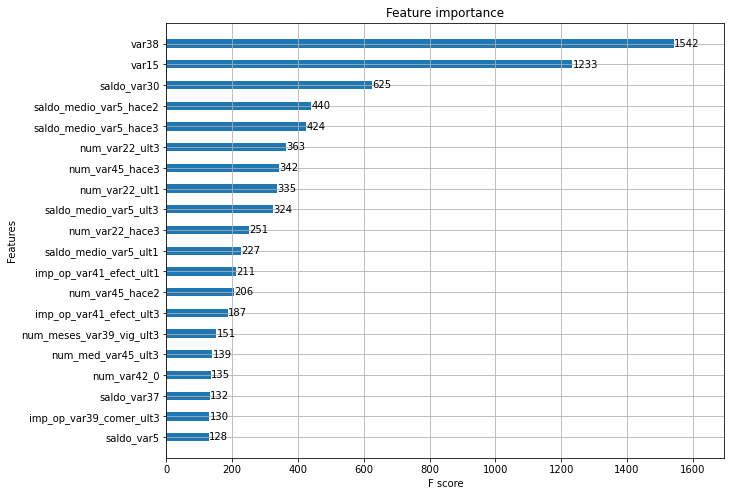

In [41]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_c, ax=ax , max_num_features=20,height=0.4)

# Light GBM을 활용한 학습

In [47]:
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(n_estimators=500)

lgbm_c.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='auc', 
           eval_set =[(X_test, y_test)], verbose = True )


[1]	valid_0's auc: 0.809748	valid_0's binary_logloss: 0.15932
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.815238	valid_0's binary_logloss: 0.15474
[3]	valid_0's auc: 0.822088	valid_0's binary_logloss: 0.151416
[4]	valid_0's auc: 0.827703	valid_0's binary_logloss: 0.14889
[5]	valid_0's auc: 0.83044	valid_0's binary_logloss: 0.146784
[6]	valid_0's auc: 0.832154	valid_0's binary_logloss: 0.145099
[7]	valid_0's auc: 0.833801	valid_0's binary_logloss: 0.143759
[8]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.142645
[9]	valid_0's auc: 0.834828	valid_0's binary_logloss: 0.141732
[10]	valid_0's auc: 0.834663	valid_0's binary_logloss: 0.141038
[11]	valid_0's auc: 0.835048	valid_0's binary_logloss: 0.14034
[12]	valid_0's auc: 0.835787	valid_0's binary_logloss: 0.139763
[13]	valid_0's auc: 0.836361	valid_0's binary_logloss: 0.139235
[14]	valid_0's auc: 0.836215	valid_0's binary_logloss: 0.138815
[15]	valid_0's auc: 0.8362	valid_0's binary_logloss: 0.138

[134]	valid_0's auc: 0.826718	valid_0's binary_logloss: 0.138832
[135]	valid_0's auc: 0.826722	valid_0's binary_logloss: 0.138867
Early stopping, best iteration is:
[35]	valid_0's auc: 0.837707	valid_0's binary_logloss: 0.135933


LGBMClassifier(n_estimators=500)

In [48]:
lgbm_roc_score = roc_auc_score(y_test, lgbm_c.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8377


* 마찬가지로 lgbm도 GridSearchCV로 하이퍼파라미터 테스트 수행

In [49]:
lgbm_c = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않는다. 
gridcv = GridSearchCV(lgbm_c, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])


[1]	valid_0's auc: 0.823924	valid_0's binary_logloss: 0.157439	valid_1's auc: 0.817101	valid_1's binary_logloss: 0.158882
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832869	valid_0's binary_logloss: 0.152026	valid_1's auc: 0.821892	valid_1's binary_logloss: 0.154268
[3]	valid_0's auc: 0.838198	valid_0's binary_logloss: 0.148059	valid_1's auc: 0.825185	valid_1's binary_logloss: 0.150906
[4]	valid_0's auc: 0.843918	valid_0's binary_logloss: 0.145006	valid_1's auc: 0.828839	valid_1's binary_logloss: 0.148222
[5]	valid_0's auc: 0.845347	valid_0's binary_logloss: 0.142405	valid_1's auc: 0.830044	valid_1's binary_logloss: 0.146206
[6]	valid_0's auc: 0.846731	valid_0's binary_logloss: 0.140335	valid_1's auc: 0.83048	valid_1's binary_logloss: 0.144635
[7]	valid_0's auc: 0.84918	valid_0's binary_logloss: 0.13853	valid_1's auc: 0.831517	valid_1's binary_logloss: 0.14325
[8]	valid_0's auc: 0.851224	valid_0's binary_logloss: 0.137066	valid_1's auc: 0.83173	val

[22]	valid_0's auc: 0.871384	valid_0's binary_logloss: 0.126846	valid_1's auc: 0.829452	valid_1's binary_logloss: 0.137771
[23]	valid_0's auc: 0.872783	valid_0's binary_logloss: 0.126391	valid_1's auc: 0.830089	valid_1's binary_logloss: 0.137606
[24]	valid_0's auc: 0.874057	valid_0's binary_logloss: 0.125964	valid_1's auc: 0.82972	valid_1's binary_logloss: 0.137584
[25]	valid_0's auc: 0.874982	valid_0's binary_logloss: 0.125571	valid_1's auc: 0.829744	valid_1's binary_logloss: 0.137555
[26]	valid_0's auc: 0.875907	valid_0's binary_logloss: 0.125213	valid_1's auc: 0.830154	valid_1's binary_logloss: 0.137431
[27]	valid_0's auc: 0.877313	valid_0's binary_logloss: 0.12482	valid_1's auc: 0.830055	valid_1's binary_logloss: 0.137385
[28]	valid_0's auc: 0.878433	valid_0's binary_logloss: 0.124467	valid_1's auc: 0.829156	valid_1's binary_logloss: 0.137454
[29]	valid_0's auc: 0.879127	valid_0's binary_logloss: 0.124134	valid_1's auc: 0.829588	valid_1's binary_logloss: 0.137384
[30]	valid_0's auc

[23]	valid_0's auc: 0.870946	valid_0's binary_logloss: 0.126569	valid_1's auc: 0.8345	valid_1's binary_logloss: 0.136667
[24]	valid_0's auc: 0.87177	valid_0's binary_logloss: 0.126178	valid_1's auc: 0.834501	valid_1's binary_logloss: 0.136608
[25]	valid_0's auc: 0.872434	valid_0's binary_logloss: 0.125869	valid_1's auc: 0.835285	valid_1's binary_logloss: 0.136446
[26]	valid_0's auc: 0.87321	valid_0's binary_logloss: 0.125534	valid_1's auc: 0.835271	valid_1's binary_logloss: 0.136364
[27]	valid_0's auc: 0.874542	valid_0's binary_logloss: 0.125181	valid_1's auc: 0.835767	valid_1's binary_logloss: 0.136218
[28]	valid_0's auc: 0.875331	valid_0's binary_logloss: 0.124849	valid_1's auc: 0.835728	valid_1's binary_logloss: 0.136157
[29]	valid_0's auc: 0.876181	valid_0's binary_logloss: 0.12452	valid_1's auc: 0.835524	valid_1's binary_logloss: 0.136107
[30]	valid_0's auc: 0.877371	valid_0's binary_logloss: 0.124186	valid_1's auc: 0.835244	valid_1's binary_logloss: 0.136093
[31]	valid_0's auc: 0

[43]	valid_0's auc: 0.887233	valid_0's binary_logloss: 0.120677	valid_1's auc: 0.836194	valid_1's binary_logloss: 0.135754
[44]	valid_0's auc: 0.887791	valid_0's binary_logloss: 0.12048	valid_1's auc: 0.836132	valid_1's binary_logloss: 0.135752
[45]	valid_0's auc: 0.888728	valid_0's binary_logloss: 0.120168	valid_1's auc: 0.835868	valid_1's binary_logloss: 0.13578
[46]	valid_0's auc: 0.889229	valid_0's binary_logloss: 0.119951	valid_1's auc: 0.835353	valid_1's binary_logloss: 0.135889
[47]	valid_0's auc: 0.889851	valid_0's binary_logloss: 0.119699	valid_1's auc: 0.835784	valid_1's binary_logloss: 0.135858
[48]	valid_0's auc: 0.890479	valid_0's binary_logloss: 0.119449	valid_1's auc: 0.835538	valid_1's binary_logloss: 0.135875
[49]	valid_0's auc: 0.891018	valid_0's binary_logloss: 0.119187	valid_1's auc: 0.835571	valid_1's binary_logloss: 0.135885
[50]	valid_0's auc: 0.89157	valid_0's binary_logloss: 0.118956	valid_1's auc: 0.835425	valid_1's binary_logloss: 0.135894
[51]	valid_0's auc:

[43]	valid_0's auc: 0.888692	valid_0's binary_logloss: 0.120237	valid_1's auc: 0.834355	valid_1's binary_logloss: 0.136098
[44]	valid_0's auc: 0.889353	valid_0's binary_logloss: 0.12006	valid_1's auc: 0.834029	valid_1's binary_logloss: 0.136129
[45]	valid_0's auc: 0.889911	valid_0's binary_logloss: 0.119878	valid_1's auc: 0.833616	valid_1's binary_logloss: 0.136198
[46]	valid_0's auc: 0.890442	valid_0's binary_logloss: 0.119662	valid_1's auc: 0.833269	valid_1's binary_logloss: 0.13626
[47]	valid_0's auc: 0.891101	valid_0's binary_logloss: 0.11946	valid_1's auc: 0.833504	valid_1's binary_logloss: 0.136198
[48]	valid_0's auc: 0.891684	valid_0's binary_logloss: 0.119233	valid_1's auc: 0.833514	valid_1's binary_logloss: 0.136201
[49]	valid_0's auc: 0.892412	valid_0's binary_logloss: 0.118977	valid_1's auc: 0.833514	valid_1's binary_logloss: 0.136217
[50]	valid_0's auc: 0.89281	valid_0's binary_logloss: 0.11878	valid_1's auc: 0.833714	valid_1's binary_logloss: 0.136193
[51]	valid_0's auc: 0

[42]	valid_0's auc: 0.88509	valid_0's binary_logloss: 0.121042	valid_1's auc: 0.83381	valid_1's binary_logloss: 0.136057
[43]	valid_0's auc: 0.885928	valid_0's binary_logloss: 0.12084	valid_1's auc: 0.834204	valid_1's binary_logloss: 0.136013
[44]	valid_0's auc: 0.8864	valid_0's binary_logloss: 0.120624	valid_1's auc: 0.834287	valid_1's binary_logloss: 0.135989
[45]	valid_0's auc: 0.886945	valid_0's binary_logloss: 0.120432	valid_1's auc: 0.834016	valid_1's binary_logloss: 0.136033
[46]	valid_0's auc: 0.887328	valid_0's binary_logloss: 0.120233	valid_1's auc: 0.833708	valid_1's binary_logloss: 0.136096
Early stopping, best iteration is:
[16]	valid_0's auc: 0.863178	valid_0's binary_logloss: 0.129872	valid_1's auc: 0.835341	valid_1's binary_logloss: 0.137468
[1]	valid_0's auc: 0.827394	valid_0's binary_logloss: 0.157644	valid_1's auc: 0.814264	valid_1's binary_logloss: 0.159392
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832826	valid_0's binary_logl

[1]	valid_0's auc: 0.823601	valid_0's binary_logloss: 0.15753	valid_1's auc: 0.813517	valid_1's binary_logloss: 0.158982
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830778	valid_0's binary_logloss: 0.151972	valid_1's auc: 0.81719	valid_1's binary_logloss: 0.154271
[3]	valid_0's auc: 0.837656	valid_0's binary_logloss: 0.147967	valid_1's auc: 0.823936	valid_1's binary_logloss: 0.150916
[4]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.144806	valid_1's auc: 0.826817	valid_1's binary_logloss: 0.1484
[5]	valid_0's auc: 0.845941	valid_0's binary_logloss: 0.14232	valid_1's auc: 0.829312	valid_1's binary_logloss: 0.14649
[6]	valid_0's auc: 0.848099	valid_0's binary_logloss: 0.140286	valid_1's auc: 0.830849	valid_1's binary_logloss: 0.144813
[7]	valid_0's auc: 0.850222	valid_0's binary_logloss: 0.138557	valid_1's auc: 0.831985	valid_1's binary_logloss: 0.143429
[8]	valid_0's auc: 0.852211	valid_0's binary_logloss: 0.137071	valid_1's auc: 0.832376	vali

[21]	valid_0's auc: 0.867868	valid_0's binary_logloss: 0.127291	valid_1's auc: 0.831779	valid_1's binary_logloss: 0.137278
[22]	valid_0's auc: 0.869036	valid_0's binary_logloss: 0.12687	valid_1's auc: 0.831747	valid_1's binary_logloss: 0.137177
[23]	valid_0's auc: 0.870452	valid_0's binary_logloss: 0.126452	valid_1's auc: 0.832192	valid_1's binary_logloss: 0.137051
[24]	valid_0's auc: 0.871766	valid_0's binary_logloss: 0.126042	valid_1's auc: 0.832774	valid_1's binary_logloss: 0.13687
[25]	valid_0's auc: 0.872803	valid_0's binary_logloss: 0.12566	valid_1's auc: 0.83272	valid_1's binary_logloss: 0.136747
[26]	valid_0's auc: 0.87381	valid_0's binary_logloss: 0.125318	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.136601
[27]	valid_0's auc: 0.874663	valid_0's binary_logloss: 0.125005	valid_1's auc: 0.833526	valid_1's binary_logloss: 0.136509
[28]	valid_0's auc: 0.875564	valid_0's binary_logloss: 0.124715	valid_1's auc: 0.834489	valid_1's binary_logloss: 0.136305
[29]	valid_0's auc: 0

[20]	valid_0's auc: 0.869102	valid_0's binary_logloss: 0.127641	valid_1's auc: 0.834241	valid_1's binary_logloss: 0.137225
[21]	valid_0's auc: 0.870269	valid_0's binary_logloss: 0.127174	valid_1's auc: 0.834778	valid_1's binary_logloss: 0.137038
[22]	valid_0's auc: 0.871834	valid_0's binary_logloss: 0.126669	valid_1's auc: 0.83475	valid_1's binary_logloss: 0.136894
[23]	valid_0's auc: 0.87292	valid_0's binary_logloss: 0.126218	valid_1's auc: 0.835291	valid_1's binary_logloss: 0.136706
[24]	valid_0's auc: 0.87448	valid_0's binary_logloss: 0.125779	valid_1's auc: 0.835044	valid_1's binary_logloss: 0.136656
[25]	valid_0's auc: 0.875363	valid_0's binary_logloss: 0.125387	valid_1's auc: 0.834884	valid_1's binary_logloss: 0.136578
[26]	valid_0's auc: 0.876104	valid_0's binary_logloss: 0.125054	valid_1's auc: 0.834616	valid_1's binary_logloss: 0.136509
[27]	valid_0's auc: 0.87675	valid_0's binary_logloss: 0.124724	valid_1's auc: 0.8349	valid_1's binary_logloss: 0.136402
[28]	valid_0's auc: 0.

[30]	valid_0's auc: 0.898816	valid_0's binary_logloss: 0.116905	valid_1's auc: 0.82976	valid_1's binary_logloss: 0.136873
[31]	valid_0's auc: 0.899761	valid_0's binary_logloss: 0.116528	valid_1's auc: 0.829309	valid_1's binary_logloss: 0.136884
[32]	valid_0's auc: 0.900485	valid_0's binary_logloss: 0.116128	valid_1's auc: 0.829352	valid_1's binary_logloss: 0.136861
[33]	valid_0's auc: 0.901293	valid_0's binary_logloss: 0.115724	valid_1's auc: 0.829413	valid_1's binary_logloss: 0.136871
[34]	valid_0's auc: 0.902095	valid_0's binary_logloss: 0.115327	valid_1's auc: 0.829199	valid_1's binary_logloss: 0.136924
[35]	valid_0's auc: 0.902929	valid_0's binary_logloss: 0.114965	valid_1's auc: 0.829575	valid_1's binary_logloss: 0.136917
[36]	valid_0's auc: 0.903534	valid_0's binary_logloss: 0.114595	valid_1's auc: 0.829576	valid_1's binary_logloss: 0.136956
[37]	valid_0's auc: 0.904526	valid_0's binary_logloss: 0.114237	valid_1's auc: 0.829163	valid_1's binary_logloss: 0.137033
[38]	valid_0's au

[1]	valid_0's auc: 0.834308	valid_0's binary_logloss: 0.15678	valid_1's auc: 0.816901	valid_1's binary_logloss: 0.158796
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84523	valid_0's binary_logloss: 0.150772	valid_1's auc: 0.825552	valid_1's binary_logloss: 0.154078
[3]	valid_0's auc: 0.851474	valid_0's binary_logloss: 0.146445	valid_1's auc: 0.824858	valid_1's binary_logloss: 0.150747
[4]	valid_0's auc: 0.855813	valid_0's binary_logloss: 0.143016	valid_1's auc: 0.827536	valid_1's binary_logloss: 0.148124
[5]	valid_0's auc: 0.860434	valid_0's binary_logloss: 0.140234	valid_1's auc: 0.828128	valid_1's binary_logloss: 0.146232
[6]	valid_0's auc: 0.862708	valid_0's binary_logloss: 0.1379	valid_1's auc: 0.829707	valid_1's binary_logloss: 0.144601
[7]	valid_0's auc: 0.864578	valid_0's binary_logloss: 0.135961	valid_1's auc: 0.830341	valid_1's binary_logloss: 0.143282
[8]	valid_0's auc: 0.866059	valid_0's binary_logloss: 0.13426	valid_1's auc: 0.829894	val

[16]	valid_0's auc: 0.879128	valid_0's binary_logloss: 0.125264	valid_1's auc: 0.828857	valid_1's binary_logloss: 0.138729
[17]	valid_0's auc: 0.88052	valid_0's binary_logloss: 0.124535	valid_1's auc: 0.828852	valid_1's binary_logloss: 0.138524
[18]	valid_0's auc: 0.881785	valid_0's binary_logloss: 0.123831	valid_1's auc: 0.828473	valid_1's binary_logloss: 0.138398
[19]	valid_0's auc: 0.883481	valid_0's binary_logloss: 0.123099	valid_1's auc: 0.828337	valid_1's binary_logloss: 0.138206
[20]	valid_0's auc: 0.885393	valid_0's binary_logloss: 0.122352	valid_1's auc: 0.82895	valid_1's binary_logloss: 0.13801
[21]	valid_0's auc: 0.887366	valid_0's binary_logloss: 0.121693	valid_1's auc: 0.828233	valid_1's binary_logloss: 0.137979
[22]	valid_0's auc: 0.889038	valid_0's binary_logloss: 0.120999	valid_1's auc: 0.828343	valid_1's binary_logloss: 0.137863
[23]	valid_0's auc: 0.890814	valid_0's binary_logloss: 0.120404	valid_1's auc: 0.828263	valid_1's binary_logloss: 0.137759
[24]	valid_0's auc:

[45]	valid_0's auc: 0.910913	valid_0's binary_logloss: 0.111582	valid_1's auc: 0.832922	valid_1's binary_logloss: 0.137065
[46]	valid_0's auc: 0.911324	valid_0's binary_logloss: 0.111279	valid_1's auc: 0.832446	valid_1's binary_logloss: 0.137188
[47]	valid_0's auc: 0.911718	valid_0's binary_logloss: 0.11099	valid_1's auc: 0.832572	valid_1's binary_logloss: 0.137148
[48]	valid_0's auc: 0.912154	valid_0's binary_logloss: 0.110731	valid_1's auc: 0.832614	valid_1's binary_logloss: 0.137136
[49]	valid_0's auc: 0.912513	valid_0's binary_logloss: 0.110459	valid_1's auc: 0.832672	valid_1's binary_logloss: 0.137182
[50]	valid_0's auc: 0.913223	valid_0's binary_logloss: 0.110136	valid_1's auc: 0.832429	valid_1's binary_logloss: 0.13721
[51]	valid_0's auc: 0.913625	valid_0's binary_logloss: 0.109853	valid_1's auc: 0.832067	valid_1's binary_logloss: 0.137357
[52]	valid_0's auc: 0.914188	valid_0's binary_logloss: 0.109588	valid_1's auc: 0.831689	valid_1's binary_logloss: 0.13741
[53]	valid_0's auc:

[15]	valid_0's auc: 0.879569	valid_0's binary_logloss: 0.126007	valid_1's auc: 0.829575	valid_1's binary_logloss: 0.139072
[16]	valid_0's auc: 0.880987	valid_0's binary_logloss: 0.125193	valid_1's auc: 0.829953	valid_1's binary_logloss: 0.138809
[17]	valid_0's auc: 0.882033	valid_0's binary_logloss: 0.124457	valid_1's auc: 0.830216	valid_1's binary_logloss: 0.138567
[18]	valid_0's auc: 0.883595	valid_0's binary_logloss: 0.123777	valid_1's auc: 0.830017	valid_1's binary_logloss: 0.138384
[19]	valid_0's auc: 0.885004	valid_0's binary_logloss: 0.12309	valid_1's auc: 0.829873	valid_1's binary_logloss: 0.138217
[20]	valid_0's auc: 0.886208	valid_0's binary_logloss: 0.122399	valid_1's auc: 0.829543	valid_1's binary_logloss: 0.138128
[21]	valid_0's auc: 0.887663	valid_0's binary_logloss: 0.121752	valid_1's auc: 0.829081	valid_1's binary_logloss: 0.138034
[22]	valid_0's auc: 0.889561	valid_0's binary_logloss: 0.12108	valid_1's auc: 0.830043	valid_1's binary_logloss: 0.13783
[23]	valid_0's auc:

[29]	valid_0's auc: 0.895977	valid_0's binary_logloss: 0.117657	valid_1's auc: 0.83273	valid_1's binary_logloss: 0.136311
[30]	valid_0's auc: 0.897479	valid_0's binary_logloss: 0.117143	valid_1's auc: 0.832591	valid_1's binary_logloss: 0.13635
[31]	valid_0's auc: 0.89897	valid_0's binary_logloss: 0.116632	valid_1's auc: 0.83243	valid_1's binary_logloss: 0.136411
[32]	valid_0's auc: 0.900115	valid_0's binary_logloss: 0.1162	valid_1's auc: 0.832233	valid_1's binary_logloss: 0.1364
[33]	valid_0's auc: 0.90129	valid_0's binary_logloss: 0.115795	valid_1's auc: 0.83196	valid_1's binary_logloss: 0.136437
[34]	valid_0's auc: 0.902768	valid_0's binary_logloss: 0.115361	valid_1's auc: 0.832184	valid_1's binary_logloss: 0.136366
[35]	valid_0's auc: 0.904178	valid_0's binary_logloss: 0.11496	valid_1's auc: 0.832032	valid_1's binary_logloss: 0.136345
[36]	valid_0's auc: 0.904877	valid_0's binary_logloss: 0.114567	valid_1's auc: 0.831983	valid_1's binary_logloss: 0.136388
[37]	valid_0's auc: 0.90625

[1]	valid_0's auc: 0.830145	valid_0's binary_logloss: 0.156867	valid_1's auc: 0.807648	valid_1's binary_logloss: 0.159412
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845552	valid_0's binary_logloss: 0.150817	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.154834
[3]	valid_0's auc: 0.850622	valid_0's binary_logloss: 0.146549	valid_1's auc: 0.821518	valid_1's binary_logloss: 0.151575
[4]	valid_0's auc: 0.856362	valid_0's binary_logloss: 0.143072	valid_1's auc: 0.824989	valid_1's binary_logloss: 0.149008
[5]	valid_0's auc: 0.860058	valid_0's binary_logloss: 0.140263	valid_1's auc: 0.825982	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.862672	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.828781	valid_1's binary_logloss: 0.14536
[7]	valid_0's auc: 0.864769	valid_0's binary_logloss: 0.135924	valid_1's auc: 0.830676	valid_1's binary_logloss: 0.14397
[8]	valid_0's auc: 0.866268	valid_0's binary_logloss: 0.13419	valid_1's auc: 0.831639	val

[21]	valid_0's auc: 0.868363	valid_0's binary_logloss: 0.127876	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.136874
[22]	valid_0's auc: 0.868898	valid_0's binary_logloss: 0.12751	valid_1's auc: 0.833639	valid_1's binary_logloss: 0.136771
[23]	valid_0's auc: 0.869983	valid_0's binary_logloss: 0.127101	valid_1's auc: 0.834123	valid_1's binary_logloss: 0.136557
[24]	valid_0's auc: 0.870815	valid_0's binary_logloss: 0.126748	valid_1's auc: 0.834189	valid_1's binary_logloss: 0.136446
[25]	valid_0's auc: 0.871876	valid_0's binary_logloss: 0.12636	valid_1's auc: 0.834027	valid_1's binary_logloss: 0.136353
[26]	valid_0's auc: 0.872803	valid_0's binary_logloss: 0.126024	valid_1's auc: 0.834216	valid_1's binary_logloss: 0.136259
[27]	valid_0's auc: 0.873757	valid_0's binary_logloss: 0.125678	valid_1's auc: 0.834485	valid_1's binary_logloss: 0.136176
[28]	valid_0's auc: 0.874962	valid_0's binary_logloss: 0.125343	valid_1's auc: 0.834107	valid_1's binary_logloss: 0.136142
[29]	valid_0's auc

[1]	valid_0's auc: 0.82342	valid_0's binary_logloss: 0.157791	valid_1's auc: 0.813798	valid_1's binary_logloss: 0.159016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831893	valid_0's binary_logloss: 0.152291	valid_1's auc: 0.820068	valid_1's binary_logloss: 0.154349
[3]	valid_0's auc: 0.839049	valid_0's binary_logloss: 0.148344	valid_1's auc: 0.826429	valid_1's binary_logloss: 0.150988
[4]	valid_0's auc: 0.841497	valid_0's binary_logloss: 0.145257	valid_1's auc: 0.829679	valid_1's binary_logloss: 0.148348
[5]	valid_0's auc: 0.845731	valid_0's binary_logloss: 0.142813	valid_1's auc: 0.833958	valid_1's binary_logloss: 0.146186
[6]	valid_0's auc: 0.847449	valid_0's binary_logloss: 0.140803	valid_1's auc: 0.834529	valid_1's binary_logloss: 0.144594
[7]	valid_0's auc: 0.850646	valid_0's binary_logloss: 0.139041	valid_1's auc: 0.834696	valid_1's binary_logloss: 0.143175
[8]	valid_0's auc: 0.85142	valid_0's binary_logloss: 0.137548	valid_1's auc: 0.835445	

[21]	valid_0's auc: 0.867708	valid_0's binary_logloss: 0.127891	valid_1's auc: 0.834065	valid_1's binary_logloss: 0.136825
[22]	valid_0's auc: 0.86901	valid_0's binary_logloss: 0.127449	valid_1's auc: 0.834146	valid_1's binary_logloss: 0.136727
[23]	valid_0's auc: 0.870037	valid_0's binary_logloss: 0.127041	valid_1's auc: 0.835234	valid_1's binary_logloss: 0.136441
[24]	valid_0's auc: 0.871184	valid_0's binary_logloss: 0.126665	valid_1's auc: 0.835026	valid_1's binary_logloss: 0.136354
[25]	valid_0's auc: 0.872396	valid_0's binary_logloss: 0.126275	valid_1's auc: 0.835046	valid_1's binary_logloss: 0.136239
[26]	valid_0's auc: 0.873449	valid_0's binary_logloss: 0.125928	valid_1's auc: 0.835399	valid_1's binary_logloss: 0.136105
[27]	valid_0's auc: 0.874308	valid_0's binary_logloss: 0.125581	valid_1's auc: 0.835324	valid_1's binary_logloss: 0.136081
[28]	valid_0's auc: 0.875025	valid_0's binary_logloss: 0.125275	valid_1's auc: 0.83538	valid_1's binary_logloss: 0.135996
[29]	valid_0's auc

[20]	valid_0's auc: 0.867767	valid_0's binary_logloss: 0.128311	valid_1's auc: 0.834404	valid_1's binary_logloss: 0.137135
[21]	valid_0's auc: 0.869147	valid_0's binary_logloss: 0.127824	valid_1's auc: 0.834961	valid_1's binary_logloss: 0.136858
[22]	valid_0's auc: 0.869869	valid_0's binary_logloss: 0.127426	valid_1's auc: 0.83513	valid_1's binary_logloss: 0.136724
[23]	valid_0's auc: 0.870991	valid_0's binary_logloss: 0.127016	valid_1's auc: 0.835626	valid_1's binary_logloss: 0.136545
[24]	valid_0's auc: 0.871926	valid_0's binary_logloss: 0.12664	valid_1's auc: 0.835205	valid_1's binary_logloss: 0.136482
[25]	valid_0's auc: 0.873174	valid_0's binary_logloss: 0.126233	valid_1's auc: 0.835607	valid_1's binary_logloss: 0.136357
[26]	valid_0's auc: 0.874165	valid_0's binary_logloss: 0.125882	valid_1's auc: 0.836021	valid_1's binary_logloss: 0.136245
[27]	valid_0's auc: 0.874864	valid_0's binary_logloss: 0.125517	valid_1's auc: 0.836327	valid_1's binary_logloss: 0.136147
[28]	valid_0's auc

[1]	valid_0's auc: 0.82606	valid_0's binary_logloss: 0.157872	valid_1's auc: 0.812618	valid_1's binary_logloss: 0.15938
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.834725	valid_0's binary_logloss: 0.152447	valid_1's auc: 0.820116	valid_1's binary_logloss: 0.154709
[3]	valid_0's auc: 0.84008	valid_0's binary_logloss: 0.148408	valid_1's auc: 0.82339	valid_1's binary_logloss: 0.151399
[4]	valid_0's auc: 0.844234	valid_0's binary_logloss: 0.145239	valid_1's auc: 0.822829	valid_1's binary_logloss: 0.148992
[5]	valid_0's auc: 0.846398	valid_0's binary_logloss: 0.142756	valid_1's auc: 0.823482	valid_1's binary_logloss: 0.14702
[6]	valid_0's auc: 0.847367	valid_0's binary_logloss: 0.140756	valid_1's auc: 0.823288	valid_1's binary_logloss: 0.145429
[7]	valid_0's auc: 0.850215	valid_0's binary_logloss: 0.139014	valid_1's auc: 0.826136	valid_1's binary_logloss: 0.144091
[8]	valid_0's auc: 0.852395	valid_0's binary_logloss: 0.137504	valid_1's auc: 0.826361	val

[22]	valid_0's auc: 0.867454	valid_0's binary_logloss: 0.127903	valid_1's auc: 0.836488	valid_1's binary_logloss: 0.136473
[23]	valid_0's auc: 0.868304	valid_0's binary_logloss: 0.127508	valid_1's auc: 0.836664	valid_1's binary_logloss: 0.136358
[24]	valid_0's auc: 0.869103	valid_0's binary_logloss: 0.127168	valid_1's auc: 0.836919	valid_1's binary_logloss: 0.136209
[25]	valid_0's auc: 0.870093	valid_0's binary_logloss: 0.126803	valid_1's auc: 0.837162	valid_1's binary_logloss: 0.136089
[26]	valid_0's auc: 0.870764	valid_0's binary_logloss: 0.12648	valid_1's auc: 0.837531	valid_1's binary_logloss: 0.135935
[27]	valid_0's auc: 0.872018	valid_0's binary_logloss: 0.126126	valid_1's auc: 0.837729	valid_1's binary_logloss: 0.135845
[28]	valid_0's auc: 0.872756	valid_0's binary_logloss: 0.12584	valid_1's auc: 0.837262	valid_1's binary_logloss: 0.13582
[29]	valid_0's auc: 0.873599	valid_0's binary_logloss: 0.125575	valid_1's auc: 0.837256	valid_1's binary_logloss: 0.135781
[30]	valid_0's auc:

[40]	valid_0's auc: 0.883694	valid_0's binary_logloss: 0.122132	valid_1's auc: 0.837225	valid_1's binary_logloss: 0.135498
[41]	valid_0's auc: 0.884302	valid_0's binary_logloss: 0.121928	valid_1's auc: 0.837239	valid_1's binary_logloss: 0.135517
[42]	valid_0's auc: 0.884901	valid_0's binary_logloss: 0.121658	valid_1's auc: 0.836679	valid_1's binary_logloss: 0.135679
[43]	valid_0's auc: 0.885642	valid_0's binary_logloss: 0.121455	valid_1's auc: 0.836533	valid_1's binary_logloss: 0.135699
[44]	valid_0's auc: 0.886104	valid_0's binary_logloss: 0.121258	valid_1's auc: 0.836385	valid_1's binary_logloss: 0.135731
[45]	valid_0's auc: 0.886647	valid_0's binary_logloss: 0.121048	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.13578
[46]	valid_0's auc: 0.887455	valid_0's binary_logloss: 0.120843	valid_1's auc: 0.836153	valid_1's binary_logloss: 0.135742
[47]	valid_0's auc: 0.888143	valid_0's binary_logloss: 0.120602	valid_1's auc: 0.835847	valid_1's binary_logloss: 0.13579
[48]	valid_0's auc

[42]	valid_0's auc: 0.886004	valid_0's binary_logloss: 0.121492	valid_1's auc: 0.835327	valid_1's binary_logloss: 0.136125
[43]	valid_0's auc: 0.886969	valid_0's binary_logloss: 0.121159	valid_1's auc: 0.835484	valid_1's binary_logloss: 0.136129
[44]	valid_0's auc: 0.887575	valid_0's binary_logloss: 0.120942	valid_1's auc: 0.835257	valid_1's binary_logloss: 0.136138
[45]	valid_0's auc: 0.88803	valid_0's binary_logloss: 0.120732	valid_1's auc: 0.835047	valid_1's binary_logloss: 0.13613
[46]	valid_0's auc: 0.888735	valid_0's binary_logloss: 0.120523	valid_1's auc: 0.834691	valid_1's binary_logloss: 0.136199
[47]	valid_0's auc: 0.889324	valid_0's binary_logloss: 0.120295	valid_1's auc: 0.834652	valid_1's binary_logloss: 0.136252
[48]	valid_0's auc: 0.889729	valid_0's binary_logloss: 0.120094	valid_1's auc: 0.834443	valid_1's binary_logloss: 0.13627
[49]	valid_0's auc: 0.890425	valid_0's binary_logloss: 0.119859	valid_1's auc: 0.83467	valid_1's binary_logloss: 0.136253
[50]	valid_0's auc: 

[16]	valid_0's auc: 0.878115	valid_0's binary_logloss: 0.126586	valid_1's auc: 0.827441	valid_1's binary_logloss: 0.139038
[17]	valid_0's auc: 0.879319	valid_0's binary_logloss: 0.125874	valid_1's auc: 0.827746	valid_1's binary_logloss: 0.13887
[18]	valid_0's auc: 0.880701	valid_0's binary_logloss: 0.125173	valid_1's auc: 0.82789	valid_1's binary_logloss: 0.138667
[19]	valid_0's auc: 0.882368	valid_0's binary_logloss: 0.124467	valid_1's auc: 0.828029	valid_1's binary_logloss: 0.138461
[20]	valid_0's auc: 0.883881	valid_0's binary_logloss: 0.123751	valid_1's auc: 0.827513	valid_1's binary_logloss: 0.138376
[21]	valid_0's auc: 0.885092	valid_0's binary_logloss: 0.123182	valid_1's auc: 0.827234	valid_1's binary_logloss: 0.138356
[22]	valid_0's auc: 0.886456	valid_0's binary_logloss: 0.122502	valid_1's auc: 0.826927	valid_1's binary_logloss: 0.138328
[23]	valid_0's auc: 0.887317	valid_0's binary_logloss: 0.122001	valid_1's auc: 0.826763	valid_1's binary_logloss: 0.13827
[24]	valid_0's auc:

[30]	valid_0's auc: 0.895087	valid_0's binary_logloss: 0.118775	valid_1's auc: 0.830312	valid_1's binary_logloss: 0.136592
[31]	valid_0's auc: 0.896364	valid_0's binary_logloss: 0.118355	valid_1's auc: 0.830867	valid_1's binary_logloss: 0.136521
[32]	valid_0's auc: 0.897372	valid_0's binary_logloss: 0.117941	valid_1's auc: 0.831029	valid_1's binary_logloss: 0.136491
[33]	valid_0's auc: 0.898399	valid_0's binary_logloss: 0.117535	valid_1's auc: 0.83111	valid_1's binary_logloss: 0.13647
[34]	valid_0's auc: 0.899623	valid_0's binary_logloss: 0.117026	valid_1's auc: 0.831108	valid_1's binary_logloss: 0.136477
[35]	valid_0's auc: 0.900702	valid_0's binary_logloss: 0.116671	valid_1's auc: 0.830561	valid_1's binary_logloss: 0.136554
[36]	valid_0's auc: 0.901677	valid_0's binary_logloss: 0.116276	valid_1's auc: 0.830465	valid_1's binary_logloss: 0.13663
[37]	valid_0's auc: 0.902592	valid_0's binary_logloss: 0.115892	valid_1's auc: 0.829918	valid_1's binary_logloss: 0.136711
[38]	valid_0's auc:

[30]	valid_0's auc: 0.896244	valid_0's binary_logloss: 0.118434	valid_1's auc: 0.832875	valid_1's binary_logloss: 0.136955
[31]	valid_0's auc: 0.897353	valid_0's binary_logloss: 0.117921	valid_1's auc: 0.832677	valid_1's binary_logloss: 0.136973
[32]	valid_0's auc: 0.898832	valid_0's binary_logloss: 0.117444	valid_1's auc: 0.832687	valid_1's binary_logloss: 0.136946
[33]	valid_0's auc: 0.899717	valid_0's binary_logloss: 0.117018	valid_1's auc: 0.832243	valid_1's binary_logloss: 0.136993
[34]	valid_0's auc: 0.900566	valid_0's binary_logloss: 0.116618	valid_1's auc: 0.832157	valid_1's binary_logloss: 0.137021
[35]	valid_0's auc: 0.901416	valid_0's binary_logloss: 0.116203	valid_1's auc: 0.832104	valid_1's binary_logloss: 0.137017
[36]	valid_0's auc: 0.902467	valid_0's binary_logloss: 0.115813	valid_1's auc: 0.832323	valid_1's binary_logloss: 0.136956
[37]	valid_0's auc: 0.903219	valid_0's binary_logloss: 0.115393	valid_1's auc: 0.831788	valid_1's binary_logloss: 0.137048
[38]	valid_0's a

[1]	valid_0's auc: 0.835593	valid_0's binary_logloss: 0.15723	valid_1's auc: 0.808883	valid_1's binary_logloss: 0.159313
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845604	valid_0's binary_logloss: 0.151401	valid_1's auc: 0.815852	valid_1's binary_logloss: 0.15474
[3]	valid_0's auc: 0.85109	valid_0's binary_logloss: 0.14721	valid_1's auc: 0.821732	valid_1's binary_logloss: 0.151475
[4]	valid_0's auc: 0.855489	valid_0's binary_logloss: 0.143798	valid_1's auc: 0.824011	valid_1's binary_logloss: 0.149043
[5]	valid_0's auc: 0.858102	valid_0's binary_logloss: 0.140979	valid_1's auc: 0.824678	valid_1's binary_logloss: 0.147103
[6]	valid_0's auc: 0.860346	valid_0's binary_logloss: 0.138731	valid_1's auc: 0.824547	valid_1's binary_logloss: 0.145451
[7]	valid_0's auc: 0.862031	valid_0's binary_logloss: 0.136845	valid_1's auc: 0.825218	valid_1's binary_logloss: 0.144127
[8]	valid_0's auc: 0.864994	valid_0's binary_logloss: 0.135125	valid_1's auc: 0.825831	va

[16]	valid_0's auc: 0.877621	valid_0's binary_logloss: 0.126847	valid_1's auc: 0.83256	valid_1's binary_logloss: 0.13754
[17]	valid_0's auc: 0.879456	valid_0's binary_logloss: 0.12605	valid_1's auc: 0.831863	valid_1's binary_logloss: 0.137456
[18]	valid_0's auc: 0.881075	valid_0's binary_logloss: 0.125277	valid_1's auc: 0.832786	valid_1's binary_logloss: 0.137194
[19]	valid_0's auc: 0.882433	valid_0's binary_logloss: 0.124604	valid_1's auc: 0.832954	valid_1's binary_logloss: 0.137044
[20]	valid_0's auc: 0.883558	valid_0's binary_logloss: 0.123983	valid_1's auc: 0.83255	valid_1's binary_logloss: 0.136924
[21]	valid_0's auc: 0.884457	valid_0's binary_logloss: 0.123397	valid_1's auc: 0.831889	valid_1's binary_logloss: 0.13691
[22]	valid_0's auc: 0.885737	valid_0's binary_logloss: 0.122828	valid_1's auc: 0.831798	valid_1's binary_logloss: 0.136808
[23]	valid_0's auc: 0.886864	valid_0's binary_logloss: 0.12228	valid_1's auc: 0.830889	valid_1's binary_logloss: 0.136871
[24]	valid_0's auc: 0.

[16]	valid_0's auc: 0.878582	valid_0's binary_logloss: 0.126466	valid_1's auc: 0.830731	valid_1's binary_logloss: 0.138593
[17]	valid_0's auc: 0.8802	valid_0's binary_logloss: 0.125717	valid_1's auc: 0.830497	valid_1's binary_logloss: 0.138347
[18]	valid_0's auc: 0.881369	valid_0's binary_logloss: 0.125052	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.138166
[19]	valid_0's auc: 0.882634	valid_0's binary_logloss: 0.124395	valid_1's auc: 0.830505	valid_1's binary_logloss: 0.137991
[20]	valid_0's auc: 0.883783	valid_0's binary_logloss: 0.123747	valid_1's auc: 0.831119	valid_1's binary_logloss: 0.137742
[21]	valid_0's auc: 0.885019	valid_0's binary_logloss: 0.123087	valid_1's auc: 0.831348	valid_1's binary_logloss: 0.137601
[22]	valid_0's auc: 0.886381	valid_0's binary_logloss: 0.122454	valid_1's auc: 0.832632	valid_1's binary_logloss: 0.137371
[23]	valid_0's auc: 0.888027	valid_0's binary_logloss: 0.121873	valid_1's auc: 0.832877	valid_1's binary_logloss: 0.137277
[24]	valid_0's auc:

[41]	valid_0's auc: 0.884436	valid_0's binary_logloss: 0.121288	valid_1's auc: 0.833474	valid_1's binary_logloss: 0.136114
[42]	valid_0's auc: 0.88509	valid_0's binary_logloss: 0.121042	valid_1's auc: 0.83381	valid_1's binary_logloss: 0.136057
[43]	valid_0's auc: 0.885928	valid_0's binary_logloss: 0.12084	valid_1's auc: 0.834204	valid_1's binary_logloss: 0.136013
[44]	valid_0's auc: 0.8864	valid_0's binary_logloss: 0.120624	valid_1's auc: 0.834287	valid_1's binary_logloss: 0.135989
[45]	valid_0's auc: 0.886945	valid_0's binary_logloss: 0.120432	valid_1's auc: 0.834016	valid_1's binary_logloss: 0.136033
[46]	valid_0's auc: 0.887328	valid_0's binary_logloss: 0.120233	valid_1's auc: 0.833708	valid_1's binary_logloss: 0.136096
Early stopping, best iteration is:
[16]	valid_0's auc: 0.863178	valid_0's binary_logloss: 0.129872	valid_1's auc: 0.835341	valid_1's binary_logloss: 0.137468
[1]	valid_0's auc: 0.827394	valid_0's binary_logloss: 0.157644	valid_1's auc: 0.814264	valid_1's binary_loglo

[64]	valid_0's auc: 0.89849	valid_0's binary_logloss: 0.1162	valid_1's auc: 0.828449	valid_1's binary_logloss: 0.137748
Early stopping, best iteration is:
[34]	valid_0's auc: 0.883156	valid_0's binary_logloss: 0.122656	valid_1's auc: 0.830241	valid_1's binary_logloss: 0.137164
[1]	valid_0's auc: 0.823601	valid_0's binary_logloss: 0.15753	valid_1's auc: 0.813517	valid_1's binary_logloss: 0.158982
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830778	valid_0's binary_logloss: 0.151972	valid_1's auc: 0.81719	valid_1's binary_logloss: 0.154271
[3]	valid_0's auc: 0.837656	valid_0's binary_logloss: 0.147967	valid_1's auc: 0.823936	valid_1's binary_logloss: 0.150916
[4]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.144806	valid_1's auc: 0.826817	valid_1's binary_logloss: 0.1484
[5]	valid_0's auc: 0.845941	valid_0's binary_logloss: 0.14232	valid_1's auc: 0.829312	valid_1's binary_logloss: 0.14649
[6]	valid_0's auc: 0.848099	valid_0's binary_logloss: 0.1

[22]	valid_0's auc: 0.869036	valid_0's binary_logloss: 0.12687	valid_1's auc: 0.831747	valid_1's binary_logloss: 0.137177
[23]	valid_0's auc: 0.870452	valid_0's binary_logloss: 0.126452	valid_1's auc: 0.832192	valid_1's binary_logloss: 0.137051
[24]	valid_0's auc: 0.871766	valid_0's binary_logloss: 0.126042	valid_1's auc: 0.832774	valid_1's binary_logloss: 0.13687
[25]	valid_0's auc: 0.872803	valid_0's binary_logloss: 0.12566	valid_1's auc: 0.83272	valid_1's binary_logloss: 0.136747
[26]	valid_0's auc: 0.87381	valid_0's binary_logloss: 0.125318	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.136601
[27]	valid_0's auc: 0.874663	valid_0's binary_logloss: 0.125005	valid_1's auc: 0.833526	valid_1's binary_logloss: 0.136509
[28]	valid_0's auc: 0.875564	valid_0's binary_logloss: 0.124715	valid_1's auc: 0.834489	valid_1's binary_logloss: 0.136305
[29]	valid_0's auc: 0.876309	valid_0's binary_logloss: 0.124403	valid_1's auc: 0.834213	valid_1's binary_logloss: 0.136325
[30]	valid_0's auc: 0

[23]	valid_0's auc: 0.87292	valid_0's binary_logloss: 0.126218	valid_1's auc: 0.835291	valid_1's binary_logloss: 0.136706
[24]	valid_0's auc: 0.87448	valid_0's binary_logloss: 0.125779	valid_1's auc: 0.835044	valid_1's binary_logloss: 0.136656
[25]	valid_0's auc: 0.875363	valid_0's binary_logloss: 0.125387	valid_1's auc: 0.834884	valid_1's binary_logloss: 0.136578
[26]	valid_0's auc: 0.876104	valid_0's binary_logloss: 0.125054	valid_1's auc: 0.834616	valid_1's binary_logloss: 0.136509
[27]	valid_0's auc: 0.87675	valid_0's binary_logloss: 0.124724	valid_1's auc: 0.8349	valid_1's binary_logloss: 0.136402
[28]	valid_0's auc: 0.877568	valid_0's binary_logloss: 0.124362	valid_1's auc: 0.834959	valid_1's binary_logloss: 0.136298
[29]	valid_0's auc: 0.878046	valid_0's binary_logloss: 0.124087	valid_1's auc: 0.834891	valid_1's binary_logloss: 0.136232
[30]	valid_0's auc: 0.879049	valid_0's binary_logloss: 0.123804	valid_1's auc: 0.834943	valid_1's binary_logloss: 0.136171
[31]	valid_0's auc: 0

[41]	valid_0's auc: 0.884436	valid_0's binary_logloss: 0.121288	valid_1's auc: 0.833474	valid_1's binary_logloss: 0.136114
[42]	valid_0's auc: 0.88509	valid_0's binary_logloss: 0.121042	valid_1's auc: 0.83381	valid_1's binary_logloss: 0.136057
[43]	valid_0's auc: 0.885928	valid_0's binary_logloss: 0.12084	valid_1's auc: 0.834204	valid_1's binary_logloss: 0.136013
[44]	valid_0's auc: 0.8864	valid_0's binary_logloss: 0.120624	valid_1's auc: 0.834287	valid_1's binary_logloss: 0.135989
[45]	valid_0's auc: 0.886945	valid_0's binary_logloss: 0.120432	valid_1's auc: 0.834016	valid_1's binary_logloss: 0.136033
[46]	valid_0's auc: 0.887328	valid_0's binary_logloss: 0.120233	valid_1's auc: 0.833708	valid_1's binary_logloss: 0.136096
Early stopping, best iteration is:
[16]	valid_0's auc: 0.863178	valid_0's binary_logloss: 0.129872	valid_1's auc: 0.835341	valid_1's binary_logloss: 0.137468
[1]	valid_0's auc: 0.827394	valid_0's binary_logloss: 0.157644	valid_1's auc: 0.814264	valid_1's binary_loglo

[63]	valid_0's auc: 0.897968	valid_0's binary_logloss: 0.11642	valid_1's auc: 0.828485	valid_1's binary_logloss: 0.137687
[64]	valid_0's auc: 0.89849	valid_0's binary_logloss: 0.1162	valid_1's auc: 0.828449	valid_1's binary_logloss: 0.137748
Early stopping, best iteration is:
[34]	valid_0's auc: 0.883156	valid_0's binary_logloss: 0.122656	valid_1's auc: 0.830241	valid_1's binary_logloss: 0.137164
[1]	valid_0's auc: 0.823601	valid_0's binary_logloss: 0.15753	valid_1's auc: 0.813517	valid_1's binary_logloss: 0.158982
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830778	valid_0's binary_logloss: 0.151972	valid_1's auc: 0.81719	valid_1's binary_logloss: 0.154271
[3]	valid_0's auc: 0.837656	valid_0's binary_logloss: 0.147967	valid_1's auc: 0.823936	valid_1's binary_logloss: 0.150916
[4]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.144806	valid_1's auc: 0.826817	valid_1's binary_logloss: 0.1484
[5]	valid_0's auc: 0.845941	valid_0's binary_logloss: 0

[21]	valid_0's auc: 0.867868	valid_0's binary_logloss: 0.127291	valid_1's auc: 0.831779	valid_1's binary_logloss: 0.137278
[22]	valid_0's auc: 0.869036	valid_0's binary_logloss: 0.12687	valid_1's auc: 0.831747	valid_1's binary_logloss: 0.137177
[23]	valid_0's auc: 0.870452	valid_0's binary_logloss: 0.126452	valid_1's auc: 0.832192	valid_1's binary_logloss: 0.137051
[24]	valid_0's auc: 0.871766	valid_0's binary_logloss: 0.126042	valid_1's auc: 0.832774	valid_1's binary_logloss: 0.13687
[25]	valid_0's auc: 0.872803	valid_0's binary_logloss: 0.12566	valid_1's auc: 0.83272	valid_1's binary_logloss: 0.136747
[26]	valid_0's auc: 0.87381	valid_0's binary_logloss: 0.125318	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.136601
[27]	valid_0's auc: 0.874663	valid_0's binary_logloss: 0.125005	valid_1's auc: 0.833526	valid_1's binary_logloss: 0.136509
[28]	valid_0's auc: 0.875564	valid_0's binary_logloss: 0.124715	valid_1's auc: 0.834489	valid_1's binary_logloss: 0.136305
[29]	valid_0's auc: 0

[22]	valid_0's auc: 0.871834	valid_0's binary_logloss: 0.126669	valid_1's auc: 0.83475	valid_1's binary_logloss: 0.136894
[23]	valid_0's auc: 0.87292	valid_0's binary_logloss: 0.126218	valid_1's auc: 0.835291	valid_1's binary_logloss: 0.136706
[24]	valid_0's auc: 0.87448	valid_0's binary_logloss: 0.125779	valid_1's auc: 0.835044	valid_1's binary_logloss: 0.136656
[25]	valid_0's auc: 0.875363	valid_0's binary_logloss: 0.125387	valid_1's auc: 0.834884	valid_1's binary_logloss: 0.136578
[26]	valid_0's auc: 0.876104	valid_0's binary_logloss: 0.125054	valid_1's auc: 0.834616	valid_1's binary_logloss: 0.136509
[27]	valid_0's auc: 0.87675	valid_0's binary_logloss: 0.124724	valid_1's auc: 0.8349	valid_1's binary_logloss: 0.136402
[28]	valid_0's auc: 0.877568	valid_0's binary_logloss: 0.124362	valid_1's auc: 0.834959	valid_1's binary_logloss: 0.136298
[29]	valid_0's auc: 0.878046	valid_0's binary_logloss: 0.124087	valid_1's auc: 0.834891	valid_1's binary_logloss: 0.136232
[30]	valid_0's auc: 0.

[31]	valid_0's auc: 0.899761	valid_0's binary_logloss: 0.116528	valid_1's auc: 0.829309	valid_1's binary_logloss: 0.136884
[32]	valid_0's auc: 0.900485	valid_0's binary_logloss: 0.116128	valid_1's auc: 0.829352	valid_1's binary_logloss: 0.136861
[33]	valid_0's auc: 0.901293	valid_0's binary_logloss: 0.115724	valid_1's auc: 0.829413	valid_1's binary_logloss: 0.136871
[34]	valid_0's auc: 0.902095	valid_0's binary_logloss: 0.115327	valid_1's auc: 0.829199	valid_1's binary_logloss: 0.136924
[35]	valid_0's auc: 0.902929	valid_0's binary_logloss: 0.114965	valid_1's auc: 0.829575	valid_1's binary_logloss: 0.136917
[36]	valid_0's auc: 0.903534	valid_0's binary_logloss: 0.114595	valid_1's auc: 0.829576	valid_1's binary_logloss: 0.136956
[37]	valid_0's auc: 0.904526	valid_0's binary_logloss: 0.114237	valid_1's auc: 0.829163	valid_1's binary_logloss: 0.137033
[38]	valid_0's auc: 0.905263	valid_0's binary_logloss: 0.113922	valid_1's auc: 0.828882	valid_1's binary_logloss: 0.137072
[39]	valid_0's a

[1]	valid_0's auc: 0.834308	valid_0's binary_logloss: 0.15678	valid_1's auc: 0.816901	valid_1's binary_logloss: 0.158796
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84523	valid_0's binary_logloss: 0.150772	valid_1's auc: 0.825552	valid_1's binary_logloss: 0.154078
[3]	valid_0's auc: 0.851474	valid_0's binary_logloss: 0.146445	valid_1's auc: 0.824858	valid_1's binary_logloss: 0.150747
[4]	valid_0's auc: 0.855813	valid_0's binary_logloss: 0.143016	valid_1's auc: 0.827536	valid_1's binary_logloss: 0.148124
[5]	valid_0's auc: 0.860434	valid_0's binary_logloss: 0.140234	valid_1's auc: 0.828128	valid_1's binary_logloss: 0.146232
[6]	valid_0's auc: 0.862708	valid_0's binary_logloss: 0.1379	valid_1's auc: 0.829707	valid_1's binary_logloss: 0.144601
[7]	valid_0's auc: 0.864578	valid_0's binary_logloss: 0.135961	valid_1's auc: 0.830341	valid_1's binary_logloss: 0.143282
[8]	valid_0's auc: 0.866059	valid_0's binary_logloss: 0.13426	valid_1's auc: 0.829894	val

[16]	valid_0's auc: 0.879128	valid_0's binary_logloss: 0.125264	valid_1's auc: 0.828857	valid_1's binary_logloss: 0.138729
[17]	valid_0's auc: 0.88052	valid_0's binary_logloss: 0.124535	valid_1's auc: 0.828852	valid_1's binary_logloss: 0.138524
[18]	valid_0's auc: 0.881785	valid_0's binary_logloss: 0.123831	valid_1's auc: 0.828473	valid_1's binary_logloss: 0.138398
[19]	valid_0's auc: 0.883481	valid_0's binary_logloss: 0.123099	valid_1's auc: 0.828337	valid_1's binary_logloss: 0.138206
[20]	valid_0's auc: 0.885393	valid_0's binary_logloss: 0.122352	valid_1's auc: 0.82895	valid_1's binary_logloss: 0.13801
[21]	valid_0's auc: 0.887366	valid_0's binary_logloss: 0.121693	valid_1's auc: 0.828233	valid_1's binary_logloss: 0.137979
[22]	valid_0's auc: 0.889038	valid_0's binary_logloss: 0.120999	valid_1's auc: 0.828343	valid_1's binary_logloss: 0.137863
[23]	valid_0's auc: 0.890814	valid_0's binary_logloss: 0.120404	valid_1's auc: 0.828263	valid_1's binary_logloss: 0.137759
[24]	valid_0's auc:

[45]	valid_0's auc: 0.910913	valid_0's binary_logloss: 0.111582	valid_1's auc: 0.832922	valid_1's binary_logloss: 0.137065
[46]	valid_0's auc: 0.911324	valid_0's binary_logloss: 0.111279	valid_1's auc: 0.832446	valid_1's binary_logloss: 0.137188
[47]	valid_0's auc: 0.911718	valid_0's binary_logloss: 0.11099	valid_1's auc: 0.832572	valid_1's binary_logloss: 0.137148
[48]	valid_0's auc: 0.912154	valid_0's binary_logloss: 0.110731	valid_1's auc: 0.832614	valid_1's binary_logloss: 0.137136
[49]	valid_0's auc: 0.912513	valid_0's binary_logloss: 0.110459	valid_1's auc: 0.832672	valid_1's binary_logloss: 0.137182
[50]	valid_0's auc: 0.913223	valid_0's binary_logloss: 0.110136	valid_1's auc: 0.832429	valid_1's binary_logloss: 0.13721
[51]	valid_0's auc: 0.913625	valid_0's binary_logloss: 0.109853	valid_1's auc: 0.832067	valid_1's binary_logloss: 0.137357
[52]	valid_0's auc: 0.914188	valid_0's binary_logloss: 0.109588	valid_1's auc: 0.831689	valid_1's binary_logloss: 0.13741
[53]	valid_0's auc:

[16]	valid_0's auc: 0.880987	valid_0's binary_logloss: 0.125193	valid_1's auc: 0.829953	valid_1's binary_logloss: 0.138809
[17]	valid_0's auc: 0.882033	valid_0's binary_logloss: 0.124457	valid_1's auc: 0.830216	valid_1's binary_logloss: 0.138567
[18]	valid_0's auc: 0.883595	valid_0's binary_logloss: 0.123777	valid_1's auc: 0.830017	valid_1's binary_logloss: 0.138384
[19]	valid_0's auc: 0.885004	valid_0's binary_logloss: 0.12309	valid_1's auc: 0.829873	valid_1's binary_logloss: 0.138217
[20]	valid_0's auc: 0.886208	valid_0's binary_logloss: 0.122399	valid_1's auc: 0.829543	valid_1's binary_logloss: 0.138128
[21]	valid_0's auc: 0.887663	valid_0's binary_logloss: 0.121752	valid_1's auc: 0.829081	valid_1's binary_logloss: 0.138034
[22]	valid_0's auc: 0.889561	valid_0's binary_logloss: 0.12108	valid_1's auc: 0.830043	valid_1's binary_logloss: 0.13783
[23]	valid_0's auc: 0.891456	valid_0's binary_logloss: 0.120424	valid_1's auc: 0.830535	valid_1's binary_logloss: 0.137693
[24]	valid_0's auc:

[32]	valid_0's auc: 0.900115	valid_0's binary_logloss: 0.1162	valid_1's auc: 0.832233	valid_1's binary_logloss: 0.1364
[33]	valid_0's auc: 0.90129	valid_0's binary_logloss: 0.115795	valid_1's auc: 0.83196	valid_1's binary_logloss: 0.136437
[34]	valid_0's auc: 0.902768	valid_0's binary_logloss: 0.115361	valid_1's auc: 0.832184	valid_1's binary_logloss: 0.136366
[35]	valid_0's auc: 0.904178	valid_0's binary_logloss: 0.11496	valid_1's auc: 0.832032	valid_1's binary_logloss: 0.136345
[36]	valid_0's auc: 0.904877	valid_0's binary_logloss: 0.114567	valid_1's auc: 0.831983	valid_1's binary_logloss: 0.136388
[37]	valid_0's auc: 0.906255	valid_0's binary_logloss: 0.114156	valid_1's auc: 0.83203	valid_1's binary_logloss: 0.136365
[38]	valid_0's auc: 0.907215	valid_0's binary_logloss: 0.113739	valid_1's auc: 0.831572	valid_1's binary_logloss: 0.136473
[39]	valid_0's auc: 0.908075	valid_0's binary_logloss: 0.113398	valid_1's auc: 0.83173	valid_1's binary_logloss: 0.13644
[40]	valid_0's auc: 0.9087

[1]	valid_0's auc: 0.830145	valid_0's binary_logloss: 0.156867	valid_1's auc: 0.807648	valid_1's binary_logloss: 0.159412
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845552	valid_0's binary_logloss: 0.150817	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.154834
[3]	valid_0's auc: 0.850622	valid_0's binary_logloss: 0.146549	valid_1's auc: 0.821518	valid_1's binary_logloss: 0.151575
[4]	valid_0's auc: 0.856362	valid_0's binary_logloss: 0.143072	valid_1's auc: 0.824989	valid_1's binary_logloss: 0.149008
[5]	valid_0's auc: 0.860058	valid_0's binary_logloss: 0.140263	valid_1's auc: 0.825982	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.862672	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.828781	valid_1's binary_logloss: 0.14536
[7]	valid_0's auc: 0.864769	valid_0's binary_logloss: 0.135924	valid_1's auc: 0.830676	valid_1's binary_logloss: 0.14397
[8]	valid_0's auc: 0.866268	valid_0's binary_logloss: 0.13419	valid_1's auc: 0.831639	val

[22]	valid_0's auc: 0.868898	valid_0's binary_logloss: 0.12751	valid_1's auc: 0.833639	valid_1's binary_logloss: 0.136771
[23]	valid_0's auc: 0.869983	valid_0's binary_logloss: 0.127101	valid_1's auc: 0.834123	valid_1's binary_logloss: 0.136557
[24]	valid_0's auc: 0.870815	valid_0's binary_logloss: 0.126748	valid_1's auc: 0.834189	valid_1's binary_logloss: 0.136446
[25]	valid_0's auc: 0.871876	valid_0's binary_logloss: 0.12636	valid_1's auc: 0.834027	valid_1's binary_logloss: 0.136353
[26]	valid_0's auc: 0.872803	valid_0's binary_logloss: 0.126024	valid_1's auc: 0.834216	valid_1's binary_logloss: 0.136259
[27]	valid_0's auc: 0.873757	valid_0's binary_logloss: 0.125678	valid_1's auc: 0.834485	valid_1's binary_logloss: 0.136176
[28]	valid_0's auc: 0.874962	valid_0's binary_logloss: 0.125343	valid_1's auc: 0.834107	valid_1's binary_logloss: 0.136142
[29]	valid_0's auc: 0.875666	valid_0's binary_logloss: 0.125059	valid_1's auc: 0.834141	valid_1's binary_logloss: 0.136102
[30]	valid_0's auc

[1]	valid_0's auc: 0.82342	valid_0's binary_logloss: 0.157791	valid_1's auc: 0.813798	valid_1's binary_logloss: 0.159016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831893	valid_0's binary_logloss: 0.152291	valid_1's auc: 0.820068	valid_1's binary_logloss: 0.154349
[3]	valid_0's auc: 0.839049	valid_0's binary_logloss: 0.148344	valid_1's auc: 0.826429	valid_1's binary_logloss: 0.150988
[4]	valid_0's auc: 0.841497	valid_0's binary_logloss: 0.145257	valid_1's auc: 0.829679	valid_1's binary_logloss: 0.148348
[5]	valid_0's auc: 0.845731	valid_0's binary_logloss: 0.142813	valid_1's auc: 0.833958	valid_1's binary_logloss: 0.146186
[6]	valid_0's auc: 0.847449	valid_0's binary_logloss: 0.140803	valid_1's auc: 0.834529	valid_1's binary_logloss: 0.144594
[7]	valid_0's auc: 0.850646	valid_0's binary_logloss: 0.139041	valid_1's auc: 0.834696	valid_1's binary_logloss: 0.143175
[8]	valid_0's auc: 0.85142	valid_0's binary_logloss: 0.137548	valid_1's auc: 0.835445	

[20]	valid_0's auc: 0.866561	valid_0's binary_logloss: 0.128327	valid_1's auc: 0.83389	valid_1's binary_logloss: 0.136975
[21]	valid_0's auc: 0.867708	valid_0's binary_logloss: 0.127891	valid_1's auc: 0.834065	valid_1's binary_logloss: 0.136825
[22]	valid_0's auc: 0.86901	valid_0's binary_logloss: 0.127449	valid_1's auc: 0.834146	valid_1's binary_logloss: 0.136727
[23]	valid_0's auc: 0.870037	valid_0's binary_logloss: 0.127041	valid_1's auc: 0.835234	valid_1's binary_logloss: 0.136441
[24]	valid_0's auc: 0.871184	valid_0's binary_logloss: 0.126665	valid_1's auc: 0.835026	valid_1's binary_logloss: 0.136354
[25]	valid_0's auc: 0.872396	valid_0's binary_logloss: 0.126275	valid_1's auc: 0.835046	valid_1's binary_logloss: 0.136239
[26]	valid_0's auc: 0.873449	valid_0's binary_logloss: 0.125928	valid_1's auc: 0.835399	valid_1's binary_logloss: 0.136105
[27]	valid_0's auc: 0.874308	valid_0's binary_logloss: 0.125581	valid_1's auc: 0.835324	valid_1's binary_logloss: 0.136081
[28]	valid_0's auc

[21]	valid_0's auc: 0.869147	valid_0's binary_logloss: 0.127824	valid_1's auc: 0.834961	valid_1's binary_logloss: 0.136858
[22]	valid_0's auc: 0.869869	valid_0's binary_logloss: 0.127426	valid_1's auc: 0.83513	valid_1's binary_logloss: 0.136724
[23]	valid_0's auc: 0.870991	valid_0's binary_logloss: 0.127016	valid_1's auc: 0.835626	valid_1's binary_logloss: 0.136545
[24]	valid_0's auc: 0.871926	valid_0's binary_logloss: 0.12664	valid_1's auc: 0.835205	valid_1's binary_logloss: 0.136482
[25]	valid_0's auc: 0.873174	valid_0's binary_logloss: 0.126233	valid_1's auc: 0.835607	valid_1's binary_logloss: 0.136357
[26]	valid_0's auc: 0.874165	valid_0's binary_logloss: 0.125882	valid_1's auc: 0.836021	valid_1's binary_logloss: 0.136245
[27]	valid_0's auc: 0.874864	valid_0's binary_logloss: 0.125517	valid_1's auc: 0.836327	valid_1's binary_logloss: 0.136147
[28]	valid_0's auc: 0.875564	valid_0's binary_logloss: 0.125196	valid_1's auc: 0.836494	valid_1's binary_logloss: 0.136096
[29]	valid_0's auc

[1]	valid_0's auc: 0.82606	valid_0's binary_logloss: 0.157872	valid_1's auc: 0.812618	valid_1's binary_logloss: 0.15938
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.834725	valid_0's binary_logloss: 0.152447	valid_1's auc: 0.820116	valid_1's binary_logloss: 0.154709
[3]	valid_0's auc: 0.84008	valid_0's binary_logloss: 0.148408	valid_1's auc: 0.82339	valid_1's binary_logloss: 0.151399
[4]	valid_0's auc: 0.844234	valid_0's binary_logloss: 0.145239	valid_1's auc: 0.822829	valid_1's binary_logloss: 0.148992
[5]	valid_0's auc: 0.846398	valid_0's binary_logloss: 0.142756	valid_1's auc: 0.823482	valid_1's binary_logloss: 0.14702
[6]	valid_0's auc: 0.847367	valid_0's binary_logloss: 0.140756	valid_1's auc: 0.823288	valid_1's binary_logloss: 0.145429
[7]	valid_0's auc: 0.850215	valid_0's binary_logloss: 0.139014	valid_1's auc: 0.826136	valid_1's binary_logloss: 0.144091
[8]	valid_0's auc: 0.852395	valid_0's binary_logloss: 0.137504	valid_1's auc: 0.826361	val

[22]	valid_0's auc: 0.867454	valid_0's binary_logloss: 0.127903	valid_1's auc: 0.836488	valid_1's binary_logloss: 0.136473
[23]	valid_0's auc: 0.868304	valid_0's binary_logloss: 0.127508	valid_1's auc: 0.836664	valid_1's binary_logloss: 0.136358
[24]	valid_0's auc: 0.869103	valid_0's binary_logloss: 0.127168	valid_1's auc: 0.836919	valid_1's binary_logloss: 0.136209
[25]	valid_0's auc: 0.870093	valid_0's binary_logloss: 0.126803	valid_1's auc: 0.837162	valid_1's binary_logloss: 0.136089
[26]	valid_0's auc: 0.870764	valid_0's binary_logloss: 0.12648	valid_1's auc: 0.837531	valid_1's binary_logloss: 0.135935
[27]	valid_0's auc: 0.872018	valid_0's binary_logloss: 0.126126	valid_1's auc: 0.837729	valid_1's binary_logloss: 0.135845
[28]	valid_0's auc: 0.872756	valid_0's binary_logloss: 0.12584	valid_1's auc: 0.837262	valid_1's binary_logloss: 0.13582
[29]	valid_0's auc: 0.873599	valid_0's binary_logloss: 0.125575	valid_1's auc: 0.837256	valid_1's binary_logloss: 0.135781
[30]	valid_0's auc:

[43]	valid_0's auc: 0.885642	valid_0's binary_logloss: 0.121455	valid_1's auc: 0.836533	valid_1's binary_logloss: 0.135699
[44]	valid_0's auc: 0.886104	valid_0's binary_logloss: 0.121258	valid_1's auc: 0.836385	valid_1's binary_logloss: 0.135731
[45]	valid_0's auc: 0.886647	valid_0's binary_logloss: 0.121048	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.13578
[46]	valid_0's auc: 0.887455	valid_0's binary_logloss: 0.120843	valid_1's auc: 0.836153	valid_1's binary_logloss: 0.135742
[47]	valid_0's auc: 0.888143	valid_0's binary_logloss: 0.120602	valid_1's auc: 0.835847	valid_1's binary_logloss: 0.13579
[48]	valid_0's auc: 0.888885	valid_0's binary_logloss: 0.120377	valid_1's auc: 0.835303	valid_1's binary_logloss: 0.135876
[49]	valid_0's auc: 0.889353	valid_0's binary_logloss: 0.120188	valid_1's auc: 0.835151	valid_1's binary_logloss: 0.135905
[50]	valid_0's auc: 0.889912	valid_0's binary_logloss: 0.119991	valid_1's auc: 0.834859	valid_1's binary_logloss: 0.135955
[51]	valid_0's auc

[42]	valid_0's auc: 0.886004	valid_0's binary_logloss: 0.121492	valid_1's auc: 0.835327	valid_1's binary_logloss: 0.136125
[43]	valid_0's auc: 0.886969	valid_0's binary_logloss: 0.121159	valid_1's auc: 0.835484	valid_1's binary_logloss: 0.136129
[44]	valid_0's auc: 0.887575	valid_0's binary_logloss: 0.120942	valid_1's auc: 0.835257	valid_1's binary_logloss: 0.136138
[45]	valid_0's auc: 0.88803	valid_0's binary_logloss: 0.120732	valid_1's auc: 0.835047	valid_1's binary_logloss: 0.13613
[46]	valid_0's auc: 0.888735	valid_0's binary_logloss: 0.120523	valid_1's auc: 0.834691	valid_1's binary_logloss: 0.136199
[47]	valid_0's auc: 0.889324	valid_0's binary_logloss: 0.120295	valid_1's auc: 0.834652	valid_1's binary_logloss: 0.136252
[48]	valid_0's auc: 0.889729	valid_0's binary_logloss: 0.120094	valid_1's auc: 0.834443	valid_1's binary_logloss: 0.13627
[49]	valid_0's auc: 0.890425	valid_0's binary_logloss: 0.119859	valid_1's auc: 0.83467	valid_1's binary_logloss: 0.136253
[50]	valid_0's auc: 

[15]	valid_0's auc: 0.877343	valid_0's binary_logloss: 0.127315	valid_1's auc: 0.827328	valid_1's binary_logloss: 0.139284
[16]	valid_0's auc: 0.878115	valid_0's binary_logloss: 0.126586	valid_1's auc: 0.827441	valid_1's binary_logloss: 0.139038
[17]	valid_0's auc: 0.879319	valid_0's binary_logloss: 0.125874	valid_1's auc: 0.827746	valid_1's binary_logloss: 0.13887
[18]	valid_0's auc: 0.880701	valid_0's binary_logloss: 0.125173	valid_1's auc: 0.82789	valid_1's binary_logloss: 0.138667
[19]	valid_0's auc: 0.882368	valid_0's binary_logloss: 0.124467	valid_1's auc: 0.828029	valid_1's binary_logloss: 0.138461
[20]	valid_0's auc: 0.883881	valid_0's binary_logloss: 0.123751	valid_1's auc: 0.827513	valid_1's binary_logloss: 0.138376
[21]	valid_0's auc: 0.885092	valid_0's binary_logloss: 0.123182	valid_1's auc: 0.827234	valid_1's binary_logloss: 0.138356
[22]	valid_0's auc: 0.886456	valid_0's binary_logloss: 0.122502	valid_1's auc: 0.826927	valid_1's binary_logloss: 0.138328
[23]	valid_0's auc

[17]	valid_0's auc: 0.879456	valid_0's binary_logloss: 0.12605	valid_1's auc: 0.831863	valid_1's binary_logloss: 0.137456
[18]	valid_0's auc: 0.881075	valid_0's binary_logloss: 0.125277	valid_1's auc: 0.832786	valid_1's binary_logloss: 0.137194
[19]	valid_0's auc: 0.882433	valid_0's binary_logloss: 0.124604	valid_1's auc: 0.832954	valid_1's binary_logloss: 0.137044
[20]	valid_0's auc: 0.883558	valid_0's binary_logloss: 0.123983	valid_1's auc: 0.83255	valid_1's binary_logloss: 0.136924
[21]	valid_0's auc: 0.884457	valid_0's binary_logloss: 0.123397	valid_1's auc: 0.831889	valid_1's binary_logloss: 0.13691
[22]	valid_0's auc: 0.885737	valid_0's binary_logloss: 0.122828	valid_1's auc: 0.831798	valid_1's binary_logloss: 0.136808
[23]	valid_0's auc: 0.886864	valid_0's binary_logloss: 0.12228	valid_1's auc: 0.830889	valid_1's binary_logloss: 0.136871
[24]	valid_0's auc: 0.887854	valid_0's binary_logloss: 0.121754	valid_1's auc: 0.831187	valid_1's binary_logloss: 0.136803
[25]	valid_0's auc: 

[16]	valid_0's auc: 0.878582	valid_0's binary_logloss: 0.126466	valid_1's auc: 0.830731	valid_1's binary_logloss: 0.138593
[17]	valid_0's auc: 0.8802	valid_0's binary_logloss: 0.125717	valid_1's auc: 0.830497	valid_1's binary_logloss: 0.138347
[18]	valid_0's auc: 0.881369	valid_0's binary_logloss: 0.125052	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.138166
[19]	valid_0's auc: 0.882634	valid_0's binary_logloss: 0.124395	valid_1's auc: 0.830505	valid_1's binary_logloss: 0.137991
[20]	valid_0's auc: 0.883783	valid_0's binary_logloss: 0.123747	valid_1's auc: 0.831119	valid_1's binary_logloss: 0.137742
[21]	valid_0's auc: 0.885019	valid_0's binary_logloss: 0.123087	valid_1's auc: 0.831348	valid_1's binary_logloss: 0.137601
[22]	valid_0's auc: 0.886381	valid_0's binary_logloss: 0.122454	valid_1's auc: 0.832632	valid_1's binary_logloss: 0.137371
[23]	valid_0's auc: 0.888027	valid_0's binary_logloss: 0.121873	valid_1's auc: 0.832877	valid_1's binary_logloss: 0.137277
[24]	valid_0's auc:

[31]	valid_0's auc: 0.894802	valid_0's binary_logloss: 0.118268	valid_1's auc: 0.830095	valid_1's binary_logloss: 0.136879
[32]	valid_0's auc: 0.895833	valid_0's binary_logloss: 0.117842	valid_1's auc: 0.829981	valid_1's binary_logloss: 0.136929
[33]	valid_0's auc: 0.89676	valid_0's binary_logloss: 0.117438	valid_1's auc: 0.829612	valid_1's binary_logloss: 0.137001
[34]	valid_0's auc: 0.897617	valid_0's binary_logloss: 0.117028	valid_1's auc: 0.828806	valid_1's binary_logloss: 0.137142
[35]	valid_0's auc: 0.898289	valid_0's binary_logloss: 0.116686	valid_1's auc: 0.828678	valid_1's binary_logloss: 0.137218
[36]	valid_0's auc: 0.899299	valid_0's binary_logloss: 0.116293	valid_1's auc: 0.8284	valid_1's binary_logloss: 0.13727
Early stopping, best iteration is:
[6]	valid_0's auc: 0.861926	valid_0's binary_logloss: 0.138502	valid_1's auc: 0.835519	valid_1's binary_logloss: 0.144356
[1]	valid_0's auc: 0.835593	valid_0's binary_logloss: 0.15723	valid_1's auc: 0.808883	valid_1's binary_loglos

[1]	valid_0's auc: 0.8366	valid_0's binary_logloss: 0.157228	valid_1's auc: 0.819461	valid_1's binary_logloss: 0.158784
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.846706	valid_0's binary_logloss: 0.151372	valid_1's auc: 0.824234	valid_1's binary_logloss: 0.154055
[3]	valid_0's auc: 0.850101	valid_0's binary_logloss: 0.147169	valid_1's auc: 0.82669	valid_1's binary_logloss: 0.150529
[4]	valid_0's auc: 0.854903	valid_0's binary_logloss: 0.143813	valid_1's auc: 0.830835	valid_1's binary_logloss: 0.147865
[5]	valid_0's auc: 0.859196	valid_0's binary_logloss: 0.141067	valid_1's auc: 0.831523	valid_1's binary_logloss: 0.145824
[6]	valid_0's auc: 0.860406	valid_0's binary_logloss: 0.138912	valid_1's auc: 0.832966	valid_1's binary_logloss: 0.144156
[7]	valid_0's auc: 0.86301	valid_0's binary_logloss: 0.136972	valid_1's auc: 0.832406	valid_1's binary_logloss: 0.142795
[8]	valid_0's auc: 0.865602	valid_0's binary_logloss: 0.135214	valid_1's auc: 0.833821	va

[30]	valid_0's auc: 0.894912	valid_0's binary_logloss: 0.118498	valid_1's auc: 0.828046	valid_1's binary_logloss: 0.137086
[31]	valid_0's auc: 0.896023	valid_0's binary_logloss: 0.118065	valid_1's auc: 0.828291	valid_1's binary_logloss: 0.137042
[32]	valid_0's auc: 0.897168	valid_0's binary_logloss: 0.117636	valid_1's auc: 0.828349	valid_1's binary_logloss: 0.137014
[33]	valid_0's auc: 0.898263	valid_0's binary_logloss: 0.11723	valid_1's auc: 0.828323	valid_1's binary_logloss: 0.137021
[34]	valid_0's auc: 0.899474	valid_0's binary_logloss: 0.116888	valid_1's auc: 0.828679	valid_1's binary_logloss: 0.136951
[35]	valid_0's auc: 0.90063	valid_0's binary_logloss: 0.116511	valid_1's auc: 0.829314	valid_1's binary_logloss: 0.136874
[36]	valid_0's auc: 0.901602	valid_0's binary_logloss: 0.116082	valid_1's auc: 0.828934	valid_1's binary_logloss: 0.136949
[37]	valid_0's auc: 0.902267	valid_0's binary_logloss: 0.115714	valid_1's auc: 0.828884	valid_1's binary_logloss: 0.136987
[38]	valid_0's auc

[1]	training's auc: 0.827017	training's binary_logloss: 0.157756	valid_1's auc: 0.813077	valid_1's binary_logloss: 0.159312
Training until validation scores don't improve for 30 rounds
[2]	training's auc: 0.832236	training's binary_logloss: 0.152258	valid_1's auc: 0.817646	valid_1's binary_logloss: 0.154544
[3]	training's auc: 0.840346	training's binary_logloss: 0.148197	valid_1's auc: 0.825097	valid_1's binary_logloss: 0.151046
[4]	training's auc: 0.847056	training's binary_logloss: 0.14504	valid_1's auc: 0.829281	valid_1's binary_logloss: 0.148444
[5]	training's auc: 0.848854	training's binary_logloss: 0.142498	valid_1's auc: 0.831132	valid_1's binary_logloss: 0.146345
[6]	training's auc: 0.850574	training's binary_logloss: 0.140439	valid_1's auc: 0.83271	valid_1's binary_logloss: 0.14466
[7]	training's auc: 0.851211	training's binary_logloss: 0.138648	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.143218
[8]	training's auc: 0.853545	training's binary_logloss: 0.137135	valid_1's

GridSearchCV(estimator=LGBMClassifier(n_estimators=200),
             param_grid={'max_depth': [128, 160],
                         'min_child_samples': [60, 100], 'num_leaves': [32, 64],
                         'subsample': [0.8, 1]})

In [57]:
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 32, 'subsample': 0.8}
ROC AUC: 0.8359


* 최적의 하이퍼 파라미터로 다시 수행

In [58]:
lgbm_c_best_params = LGBMClassifier(n_estimators = 1000, num_leaves=32,subsample=0.8,
                                   min_child_samples=100,max_depth=128)

lgbm_c_best_params.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_test,y_test)],
                verbose=True)

[1]	valid_0's auc: 0.813077	valid_0's binary_logloss: 0.159312
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.817646	valid_0's binary_logloss: 0.154544
[3]	valid_0's auc: 0.825097	valid_0's binary_logloss: 0.151046
[4]	valid_0's auc: 0.829281	valid_0's binary_logloss: 0.148444
[5]	valid_0's auc: 0.831132	valid_0's binary_logloss: 0.146345
[6]	valid_0's auc: 0.83271	valid_0's binary_logloss: 0.14466
[7]	valid_0's auc: 0.833775	valid_0's binary_logloss: 0.143218
[8]	valid_0's auc: 0.833609	valid_0's binary_logloss: 0.142134
[9]	valid_0's auc: 0.83394	valid_0's binary_logloss: 0.141242
[10]	valid_0's auc: 0.834195	valid_0's binary_logloss: 0.140435
[11]	valid_0's auc: 0.834775	valid_0's binary_logloss: 0.139844
[12]	valid_0's auc: 0.834225	valid_0's binary_logloss: 0.139316
[13]	valid_0's auc: 0.834114	valid_0's binary_logloss: 0.138886
[14]	valid_0's auc: 0.833845	valid_0's binary_logloss: 0.138477
[15]	valid_0's auc: 0.834297	valid_0's binary_logloss:

LGBMClassifier(max_depth=128, min_child_samples=100, n_estimators=1000,
               num_leaves=32, subsample=0.8)

In [59]:

lgbm_roc_score = roc_auc_score(y_test, lgbm_c_best_params.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8359
